In [293]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #library for data manipulation and analysis
import numpy as np #library used for working with arrays
import matplotlib.pyplot as plt #library for plots and visualizations
import seaborn as sns #library for visualizations
from scipy.stats import norm #using normal distibutions
from scipy.stats import zscore




# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

###Heirarchical CLustering and PCA
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from sklearn.decomposition import PCA
from scipy.stats import zscore



#Deeplearning

import pandas as pd
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


# import torch
# import torchvision
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# import torch.nn as nn
# import torch.nn.functional as F
# from torchvision.datasets import MNIST
# from torchvision.transforms import ToTensor
# from torchvision.utils import make_grid
# from torch.utils.data.dataloader import DataLoader
# from torch.utils.data import random_split
# %matplotlib inline
# # Use a white background for matplotlib figures
# matplotlib.rcParams['figure.facecolor'] = '#ffffff'




#Neural Networks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")




%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations


import scipy.stats #library contains a number of probibility distributions and statistical functions

df = pd.read_csv('Churn.csv')



df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   
2       8 159660.80              3          1               0   
3       1      0.00              2          0               0   
4       2 125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0


# Objective:

To understand why customers leave the bank, and possibly make recomendations on how to keep current customers.


### Data Dictionary

CustomerId: Unique ID which is assigned to each customer

Surname: Last name of the customer

CreditScore: It defines the credit history of the customer.  

Geography: A customer’s location   

Gender: It defines the Gender of the customer 

Age: Age of the customer 

Tenure: Number of years for which the customer has been with the bank

NumOfProducts: It refers to the number of products that a customer has purchased through the bank.

Balance: Account balance

HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.

EstimatedSalary: Estimated salary 

isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

In [141]:
df.isnull().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [294]:
df.drop(['RowNumber'], axis=1, inplace=True)
df.drop(['CustomerId'], axis=1, inplace=True)
df.drop(['Surname'], axis=1, inplace=True)

df.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619    France  Female   42       2      0.00              1   
1          608     Spain  Female   41       1  83807.86              1   
2          502    France  Female   42       8 159660.80              3   
3          699    France  Female   39       1      0.00              2   
4          850     Spain  Female   43       2 125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [61]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [62]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [63]:
#################################CHECK DUPLICATES
#check for duplicated rows
df.duplicated().sum()

0

In [295]:
#below redefining buckets for each case
# replaceStruct = {

#                 "Geography": {"France": 1, "Spain":2 , "Germany": 3},
#                 "Gender":     {"Female": 1, "Male": 0 }
#                    }
oneHotCols=["Geography","Gender"]


#reassign the values in the dataframe

# df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.00              1          1   
1          608   41       1  83807.86              1          0   
2          502   42       8 159660.80              3          1   
3          699   39       1      0.00              2          0   
4          850   43       2 125510.82              1          1   
5          645   44       8 113755.78              2          1   
6          822   50       7      0.00              2          1   
7          376   29       4 115046.74              4          1   
8          501   44       4 142051.07              2          0   
9          684   27       2 134603.88              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   
5               0        149756.71       1                 0   
6               1         10062.80       0                 1   
7               0        119346.88       1                 0   
8               1         74940.50       0                 1   
9               1         71725.73       0                 1   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2                  0                0              1            0  
3                  0                0              1            0  
4                  0                1              1            0  
5                  0                1              0            1  
6                  0                0              0            1  
7                  1                0              1            0  
8                  0                0              0            1  
9                  0                0              0            1

In [65]:
df.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [66]:
df.loc[df['Tenure'],'Tenure'].value_counts(dropna=False)

2    2386
8    2060
4    2053
1    2044
7     967
6     490
Name: Tenure, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


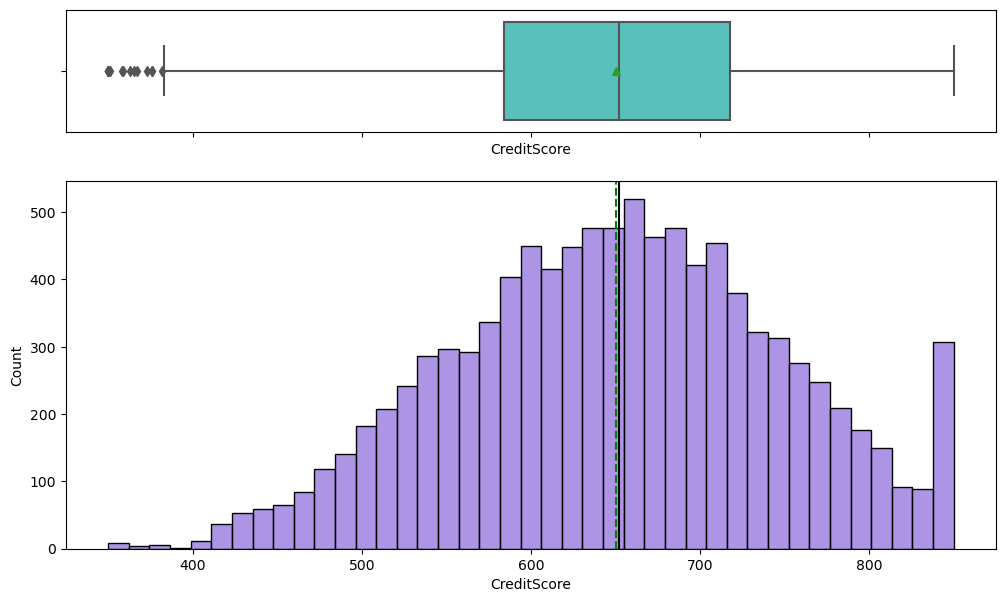

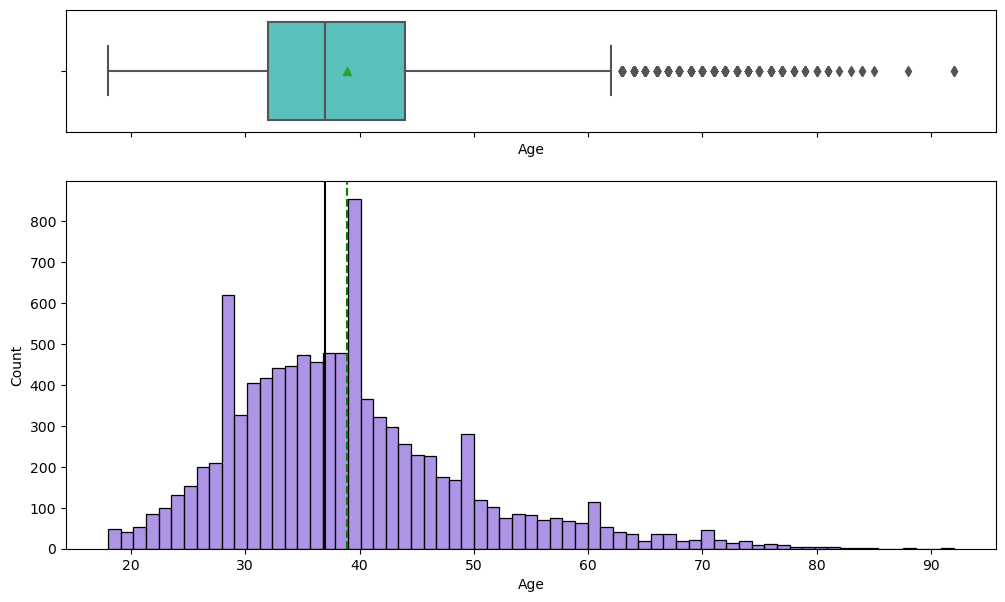

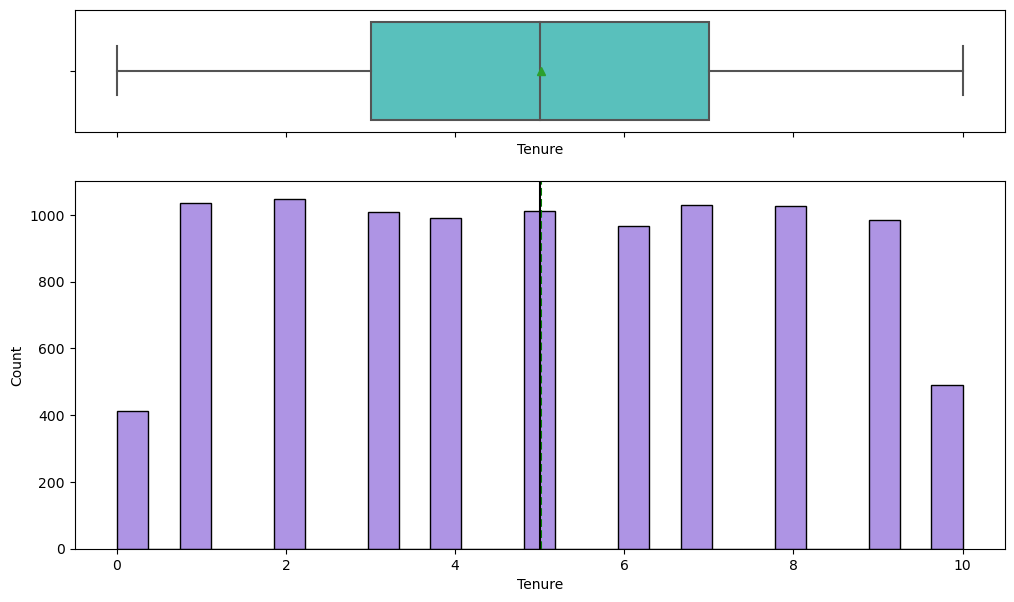

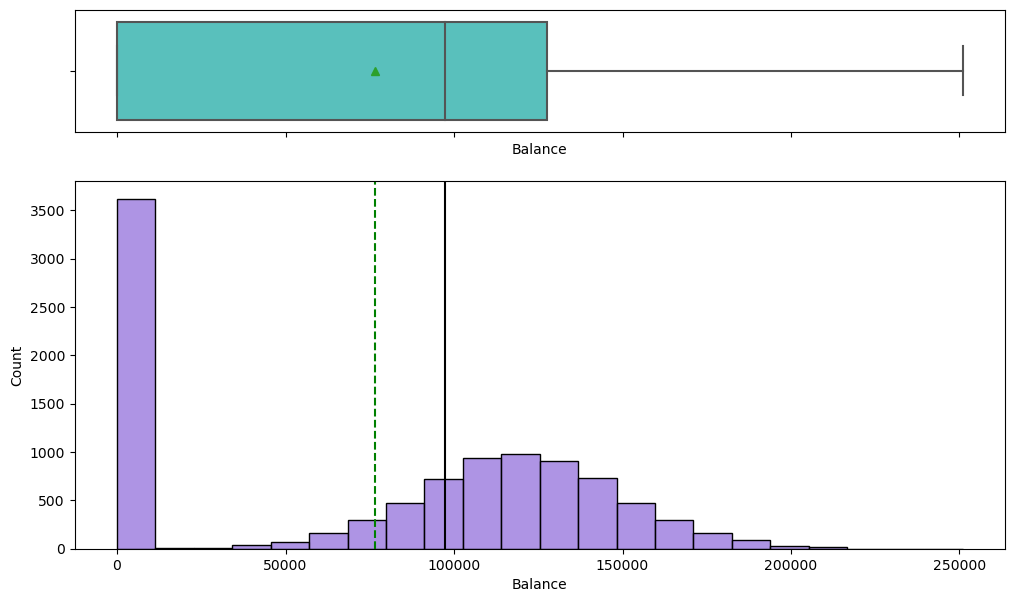

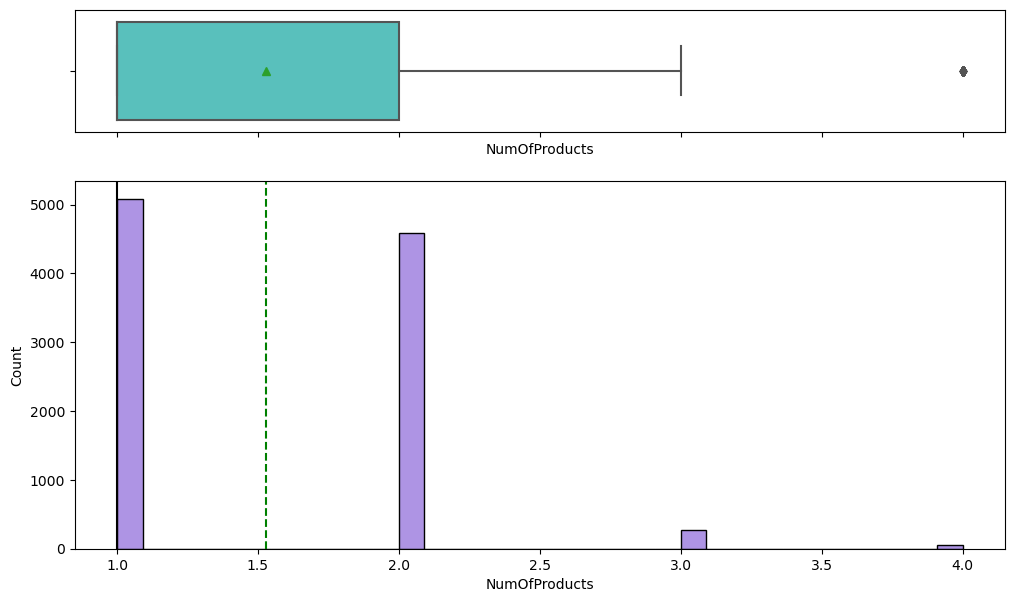

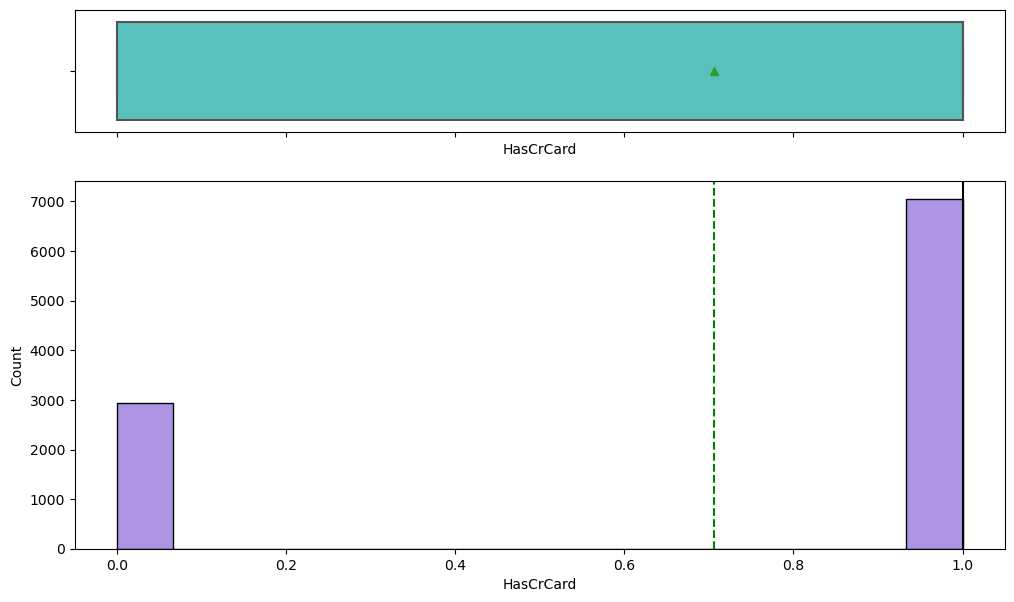

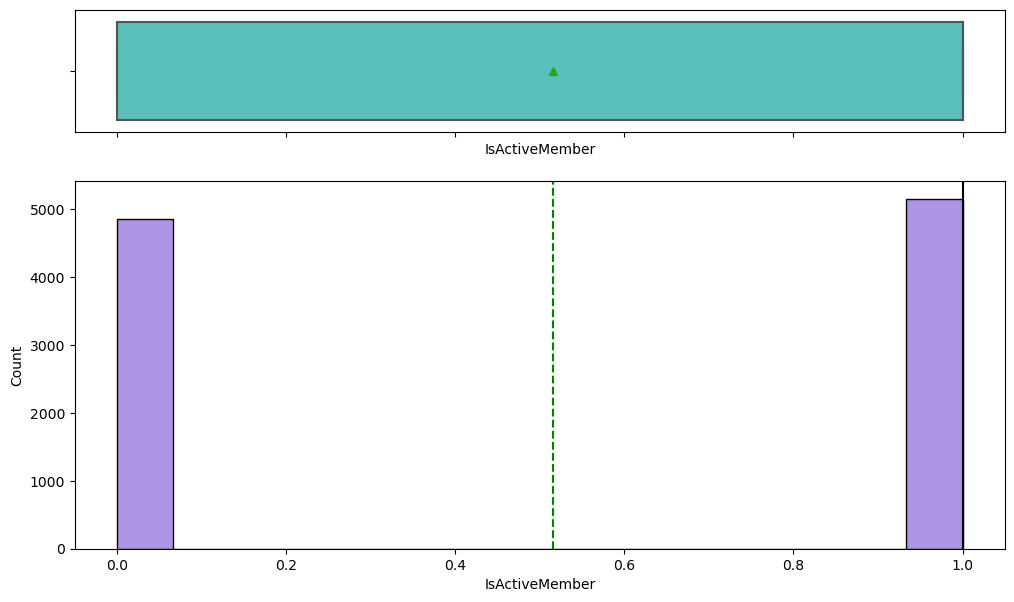

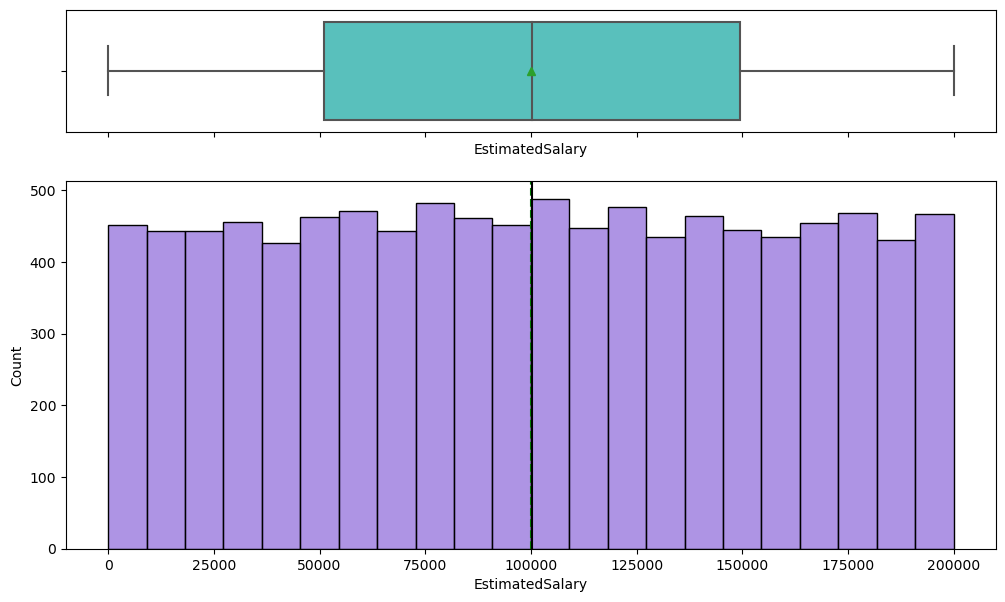

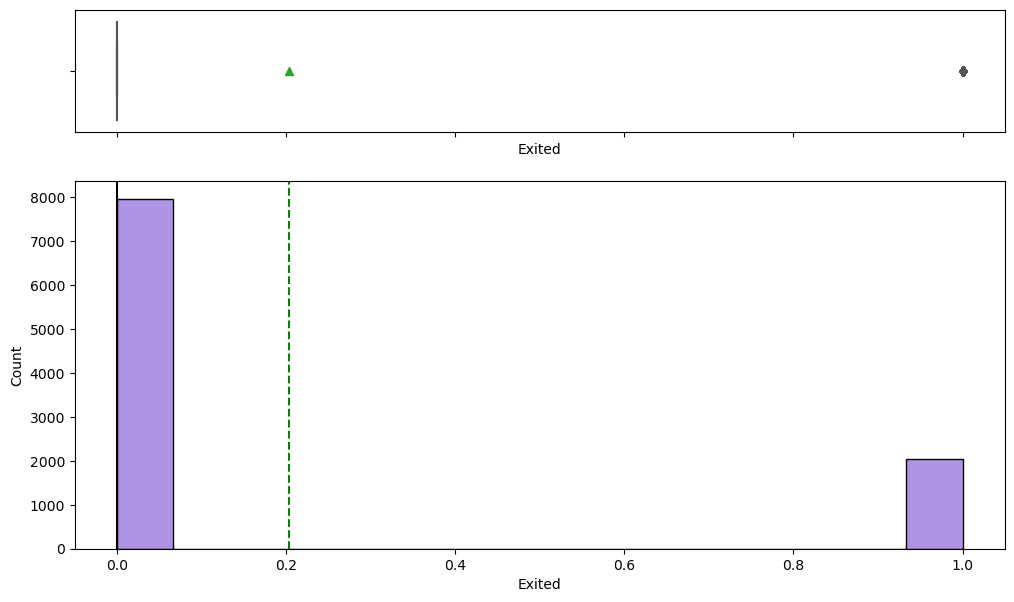

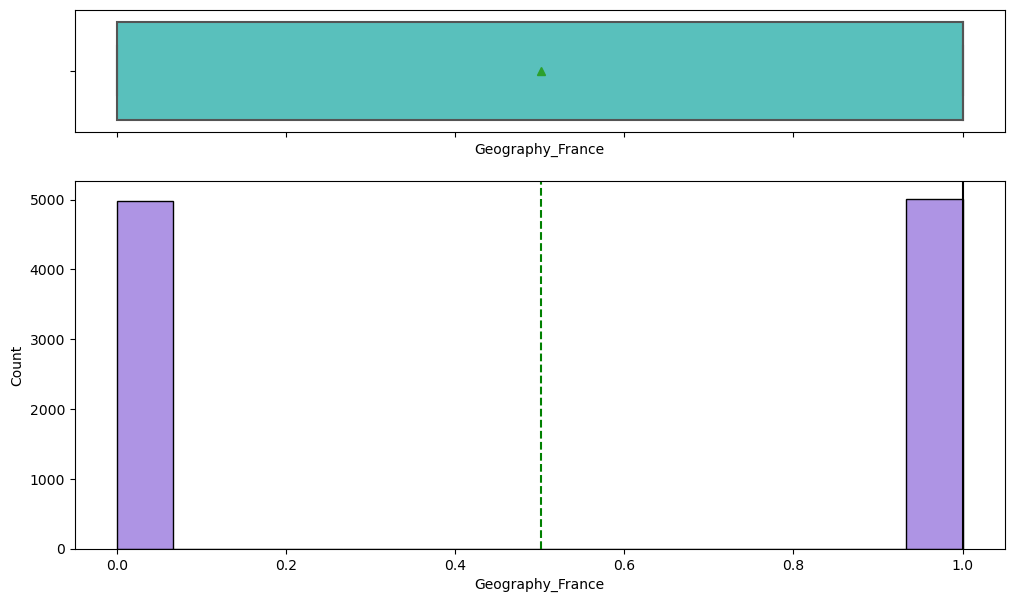

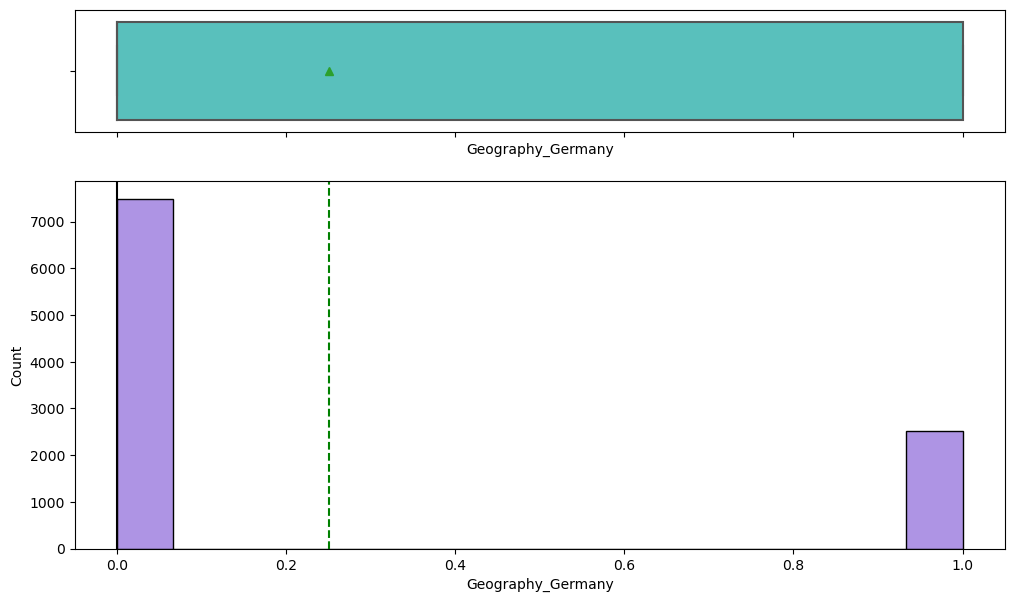

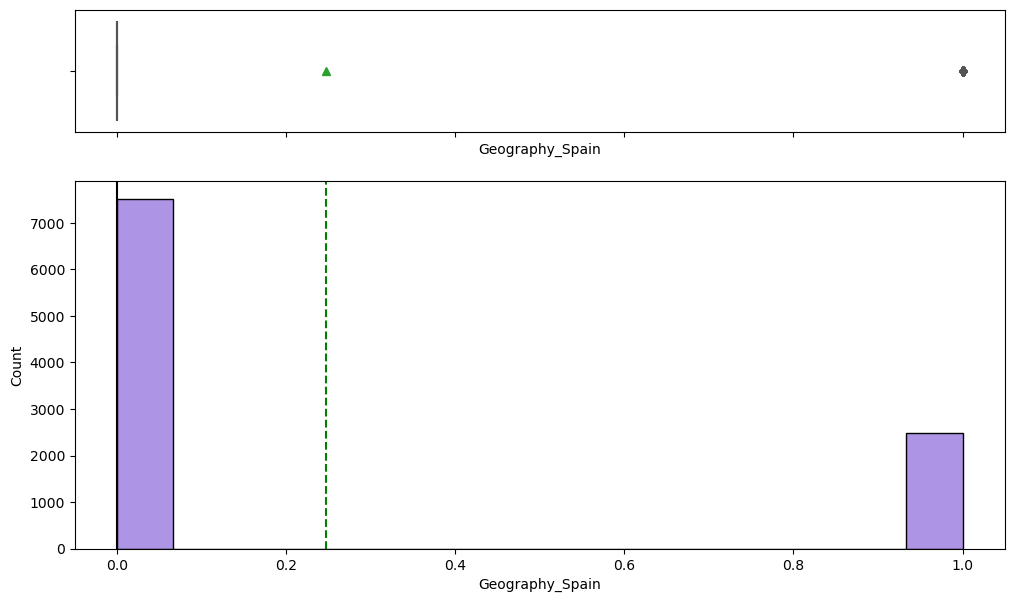

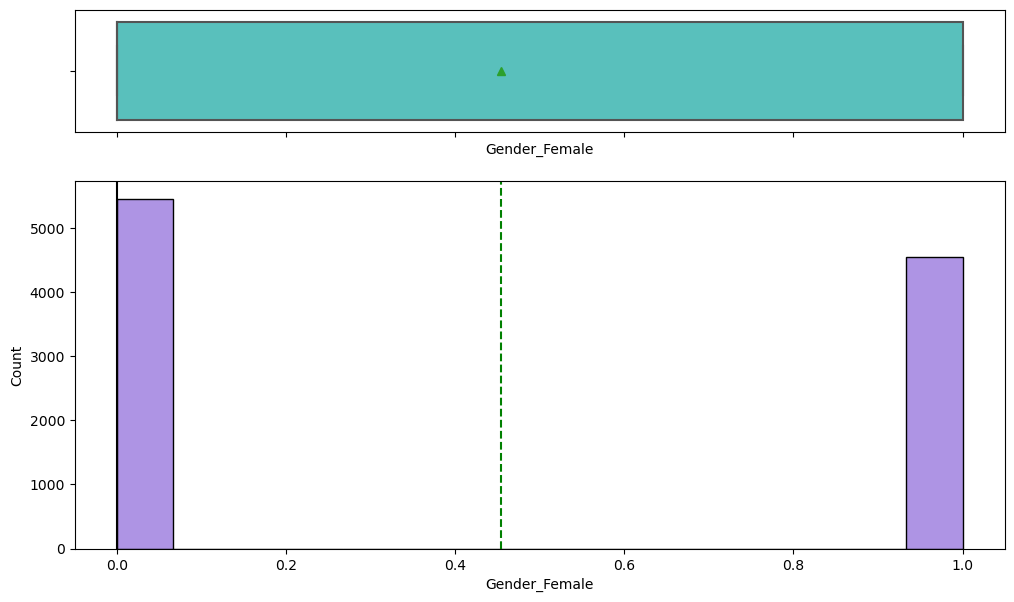

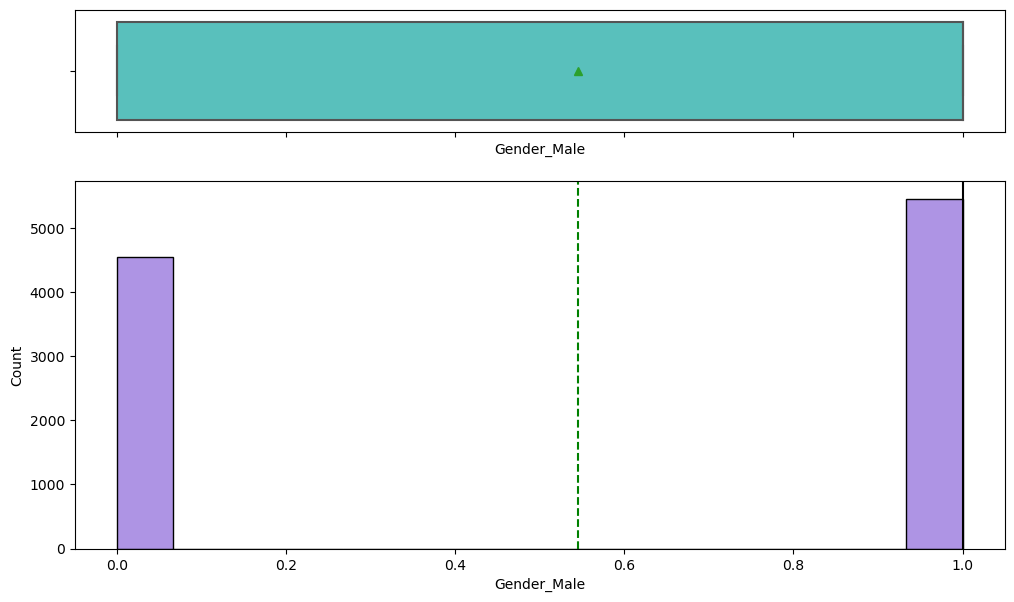

In [156]:
####################################MAKE A LIST OF NON OBJECT COLUMN NAMES

#Box plot function

# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram


#########################

columns_list = []

for i in df.columns:
    if df.dtypes[i]!=object:
        columns_list.append(i)

for i in columns_list:
    histogram_boxplot(df,i)  #you can't use this part without the defined functions


### Notes

1. Age is going to have to be bucketed into bins.  I want to look at outilers for the Age column because the data looks right skewed.
2. Balance is also going to have to be binned also there seems to be an outlier for 0. value that is causing the data to be bimodal
3. Number of Products also seems to be right skewed so I will look at that last.
4. Estimated Salary is also going to need to be binned.

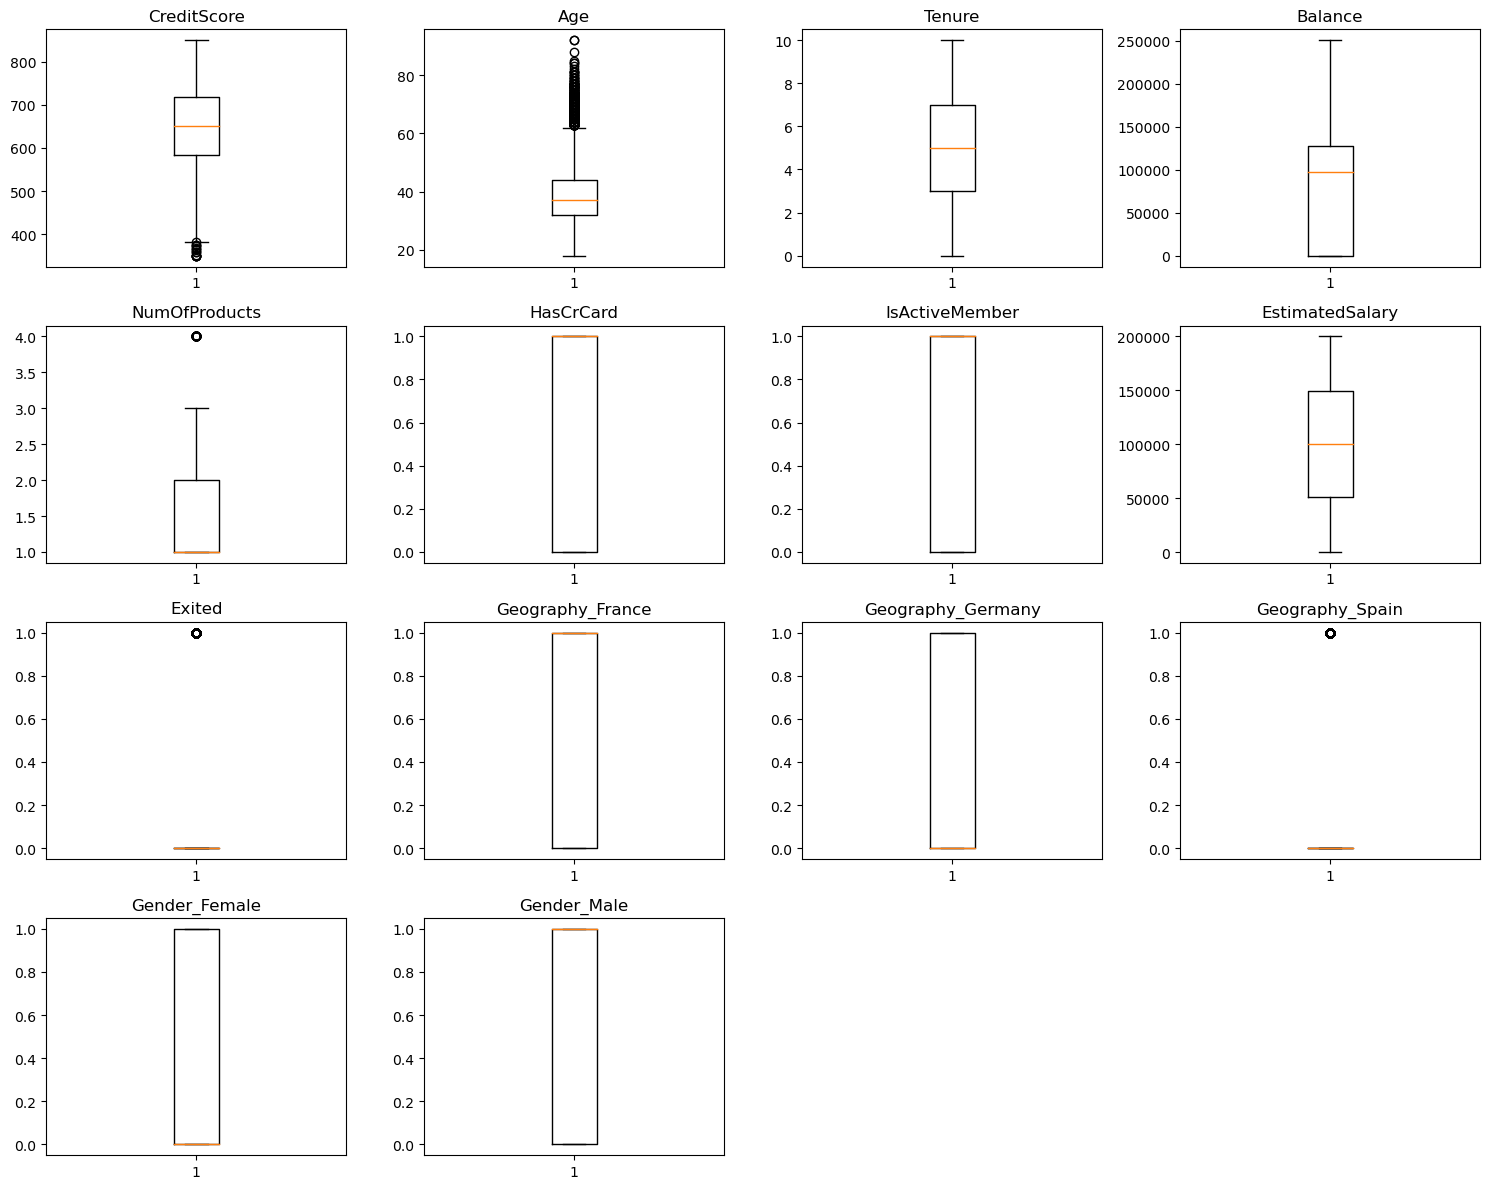

CreditScore          0.15
Age                  3.59
Tenure               0.00
Balance              0.00
NumOfProducts        0.60
HasCrCard            0.00
IsActiveMember       0.00
EstimatedSalary      0.00
Exited              20.37
Geography_France     0.00
Geography_Germany    0.00
Geography_Spain     24.77
Gender_Female        0.00
Gender_Male          0.00
dtype: float64

In [296]:


#################################OUTLIER TEST

# outlier detection using boxplot - UNIVARIATE FIRST
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = columns_list
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


#IQR

# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

# Percentage of outliers in each column
((df[numeric_columns] < lower_whisker) | (df[numeric_columns] > upper_whisker)).sum()/df.shape[0]*100

In [146]:
df.loc[df['NumOfProducts'],'NumOfProducts'].value_counts(dropna=False)

1    5144
3    4590
2     266
Name: NumOfProducts, dtype: int64

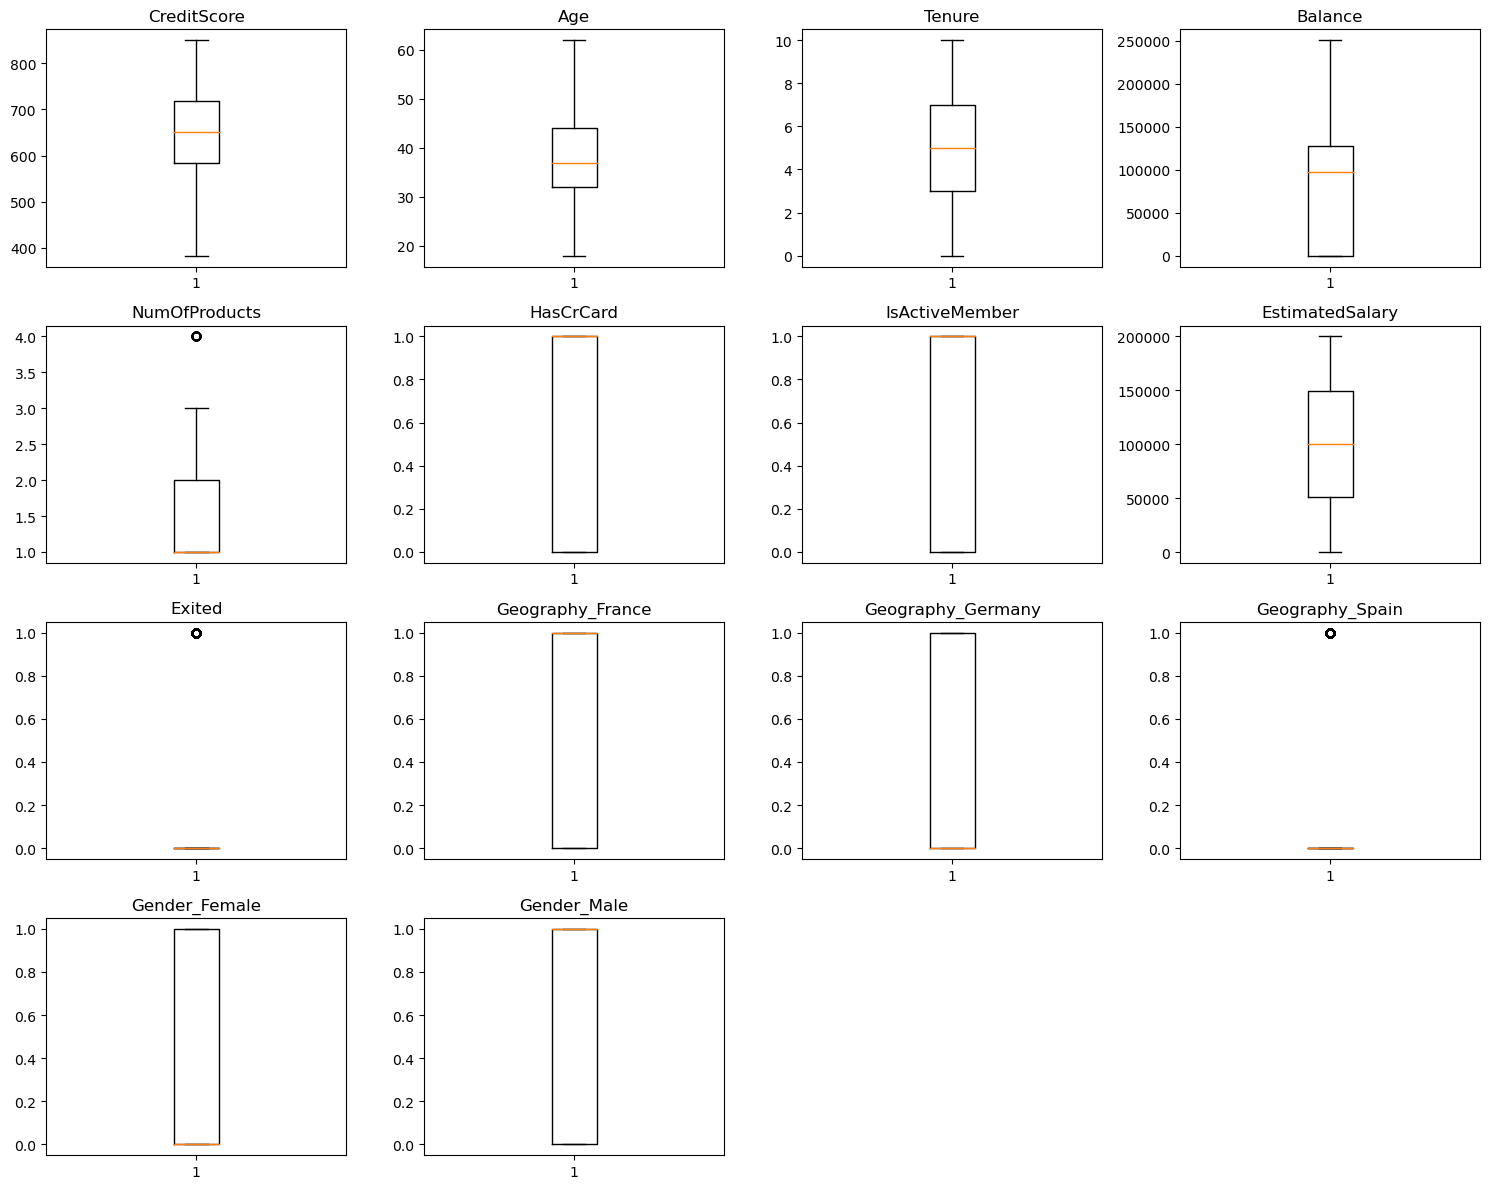

In [297]:

####################################TREATING OUTLIERS

#IQR

def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

#check the outliers

#Treating outliers in Rooms column

df = treat_outliers(df,'Age')
df = treat_outliers(df,'CreditScore')
#df = treat_outliers(df,'NumOfProducts')

# visualizing the column after outlier treatment
# outlier detection using boxplot
# selecting the numerical columns where outliers were treated 

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

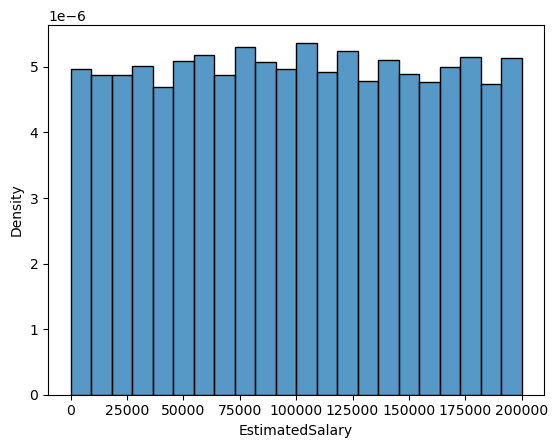

In [299]:
sns.histplot(data=df,x='EstimatedSalary',stat='density')
plt.show()



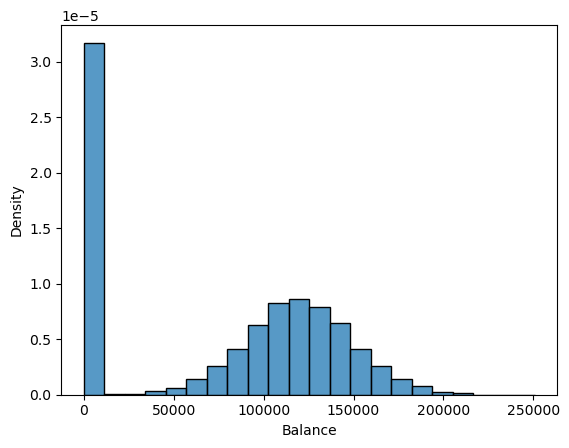

In [301]:
sns.histplot(data=df,x='Balance',stat='density')
plt.show()

In [302]:
df = df[df['Balance']>0] 

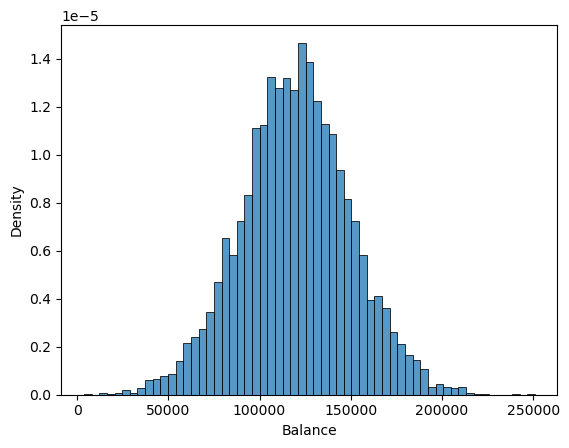

In [303]:
sns.histplot(data=df,x='Balance',stat='density')
plt.show()

In [306]:
df['Balance_range'] = pd.qcut(df['Balance'], q=4)
df['EstimatedSalary_range'] = pd.qcut(df['EstimatedSalary'], q=5)


In [309]:
df.head()

CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
1          608   41       1  83807.86              1          0   
2          502   42       8 159660.80              3          1   
4          850   43       2 125510.82              1          1   
5          645   44       8 113755.78              2          1   
7          383   29       4 115046.74              4          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
4               1         79084.10       0                 0   
5               0        149756.71       1                 0   
7               0        119346.88       1                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  \
1                  0                1              1            0   
2                  0                0              1            0   
4                  0                1              1            0   
5                  0                1              0            1   
7                  1                0              1            0   

  Balance_label EstimatedSalary_label            Balance_range  \
1             1                     3   (3768.689, 100181.975]   
2             4                     3   (139512.29, 250898.09]   
4             3                     2   (119839.69, 139512.29]   
5             2                     4  (100181.975, 119839.69]   
7             2                     3  (100181.975, 119839.69]   

     EstimatedSalary_range  
1   (80414.646, 120377.52]  
2   (80414.646, 120377.52]  
4   (41818.154, 80414.646]  
5  (120377.52, 160494.082]  
7   (80414.646, 120377.52]

In [311]:
df.EstimatedSalary_range.unique()

[(80414.646, 120377.52], (41818.154, 80414.646], (120377.52, 160494.082], (11.579, 41818.154], (160494.082, 199970.74]]
Categories (5, interval[float64, right]): [(11.579, 41818.154] < (41818.154, 80414.646] < (80414.646, 120377.52] < (120377.52, 160494.082] < (160494.082, 199970.74]]

In [312]:


bal_labels = ['Balance: 0 - 100181',
              'Balance: 100181 - 119839',
              'Balance: 119829 - 139512',
              'Balance: 139512 - 250898']
sal_labels = ['EstSalary: 11 - 41818',
              'EstSalary: 41818 - 80414',
              'EstSalary: 80414 - 120377',
              'EstSalary: 120377 - 160494',
              'EstSalary: 160494 - 200000']


df['Balance_label'] = pd.qcut(df['Balance'], q=4, labels=bal_labels)
df['EstimatedSalary_label'] = pd.qcut(df['EstimatedSalary'], q=5, labels=sal_labels)

df.head()

CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
1          608   41       1  83807.86              1          0   
2          502   42       8 159660.80              3          1   
4          850   43       2 125510.82              1          1   
5          645   44       8 113755.78              2          1   
7          383   29       4 115046.74              4          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
4               1         79084.10       0                 0   
5               0        149756.71       1                 0   
7               0        119346.88       1                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  \
1                  0                1              1            0   
2                  0                0              1            0   
4                  0                1              1            0   
5                  0                1              0            1   
7                  1                0              1            0   

              Balance_label       EstimatedSalary_label  \
1       Balance: 0 - 100181   EstSalary: 80414 - 120377   
2  Balance: 139512 - 250898   EstSalary: 80414 - 120377   
4  Balance: 119829 - 139512    EstSalary: 41818 - 80414   
5  Balance: 100181 - 119839  EstSalary: 120377 - 160494   
7  Balance: 100181 - 119839   EstSalary: 80414 - 120377   

             Balance_range    EstimatedSalary_range  
1   (3768.689, 100181.975]   (80414.646, 120377.52]  
2   (139512.29, 250898.09]   (80414.646, 120377.52]  
4   (119839.69, 139512.29]   (41818.154, 80414.646]  
5  (100181.975, 119839.69]  (120377.52, 160494.082]  
7  (100181.975, 119839.69]   (80414.646, 120377.52]

In [313]:
             

df.drop(['Balance_range'], axis=1, inplace=True) 
df.drop(['EstimatedSalary_range'], axis=1, inplace=True) 
    
oneHotCols=["Balance_label","EstimatedSalary_label"]


df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
1           608   41       1  83807.86              1          0   
2           502   42       8 159660.80              3          1   
4           850   43       2 125510.82              1          1   
5           645   44       8 113755.78              2          1   
7           383   29       4 115046.74              4          1   
8           501   44       4 142051.07              2          0   
9           684   27       2 134603.88              1          1   
10          528   31       6 102016.72              2          0   
15          616   45       3 143129.41              2          0   
16          653   58       1 132602.88              1          1   

    IsActiveMember  EstimatedSalary  Exited  Geography_France  ...  \
1                1        112542.58       0                 0  ...   
2                0        113931.57       1                 1  ...   
4                1         79084.10       0                 0  ...   
5                0        149756.71       1                 0  ...   
7                0        119346.88       1                 0  ...   
8                1         74940.50       0                 1  ...   
9                1         71725.73       0                 1  ...   
10               0         80181.12       0                 1  ...   
15               1         64327.26       0                 0  ...   
16               0          5097.67       1                 0  ...   

    Gender_Male  Balance_label_Balance: 0 - 100181  \
1             0                                  1   
2             0                                  0   
4             0                                  0   
5             1                                  0   
7             0                                  0   
8             1                                  0   
9             1                                  0   
10            1                                  0   
15            1                                  0   
16            1                                  0   

    Balance_label_Balance: 100181 - 119839  \
1                                        0   
2                                        0   
4                                        0   
5                                        1   
7                                        1   
8                                        0   
9                                        0   
10                                       1   
15                                       0   
16                                       0   

    Balance_label_Balance: 119829 - 139512  \
1                                        0   
2                                        0   
4                                        1   
5                                        0   
7                                        0   
8                                        0   
9                                        1   
10                                       0   
15                                       0   
16                                       1   

    Balance_label_Balance: 139512 - 250898  \
1                                        0   
2                                        1   
4                                        0   
5                                        0   
7                                        0   
8                                        1   
9                                        0   
10                                       0   
15                                       1   
16                                       0   

    EstimatedSalary_label_EstSalary: 11 - 41818  \
1                                             0   
2                                             0   
4                                             0   
5                                             0   
7                                             0   
8                                             0   
9          

In [315]:
df.drop(['Balance'], axis=1, inplace=True) 
df.drop(['EstimatedSalary'], axis=1, inplace=True) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6383 entries, 1 to 9999
Data columns (total 21 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   CreditScore                                       6383 non-null   int64
 1   Age                                               6383 non-null   int64
 2   Tenure                                            6383 non-null   int64
 3   NumOfProducts                                     6383 non-null   int64
 4   HasCrCard                                         6383 non-null   int64
 5   IsActiveMember                                    6383 non-null   int64
 6   Exited                                            6383 non-null   int64
 7   Geography_France                                  6383 non-null   uint8
 8   Geography_Germany                                 6383 non-null   uint8
 9   Geography_Spain                          

In [317]:
df.isnull().sum().sort_values(ascending=False)

CreditScore                                         0
Gender_Male                                         0
EstimatedSalary_label_EstSalary: 120377 - 160494    0
EstimatedSalary_label_EstSalary: 80414 - 120377     0
EstimatedSalary_label_EstSalary: 41818 - 80414      0
EstimatedSalary_label_EstSalary: 11 - 41818         0
Balance_label_Balance: 139512 - 250898              0
Balance_label_Balance: 119829 - 139512              0
Balance_label_Balance: 100181 - 119839              0
Balance_label_Balance: 0 - 100181                   0
Gender_Female                                       0
Age                                                 0
Geography_Spain                                     0
Geography_Germany                                   0
Geography_France                                    0
Exited                                              0
IsActiveMember                                      0
HasCrCard                                           0
NumOfProducts               

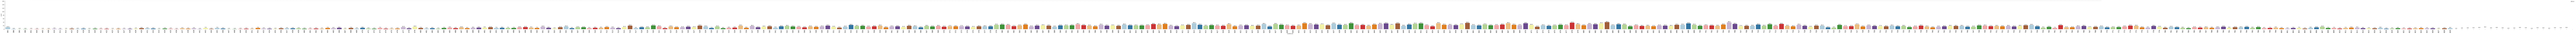

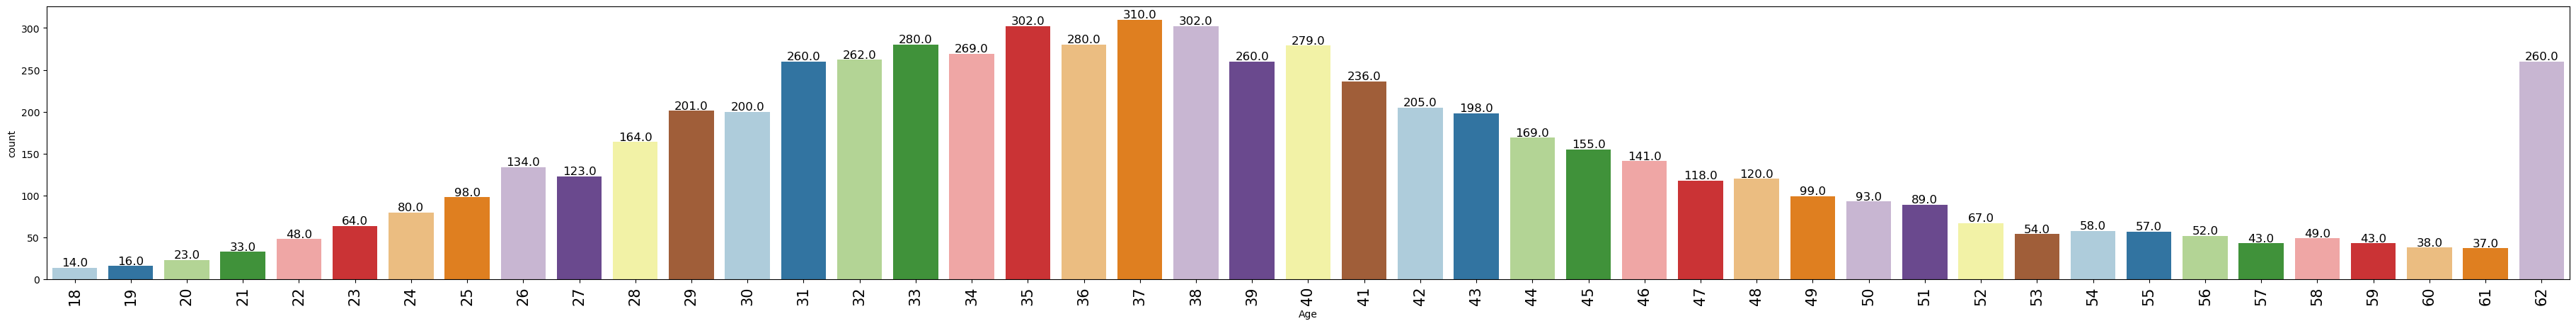

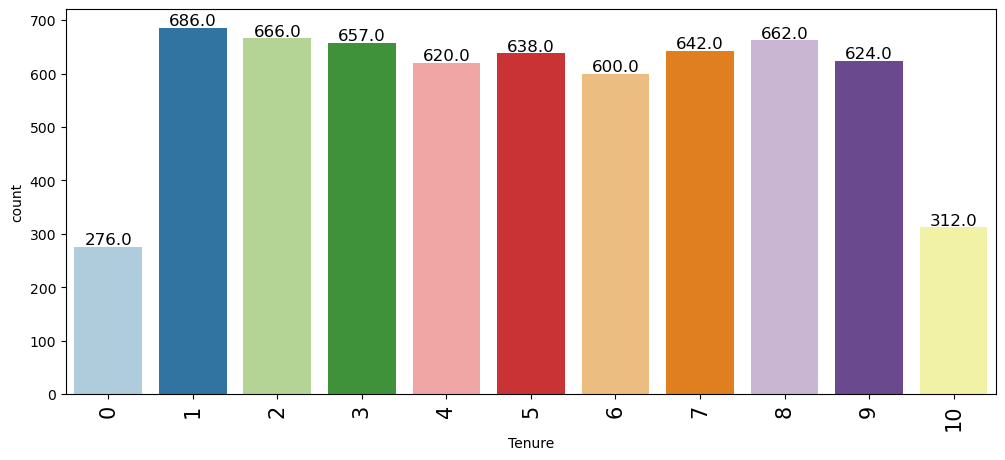

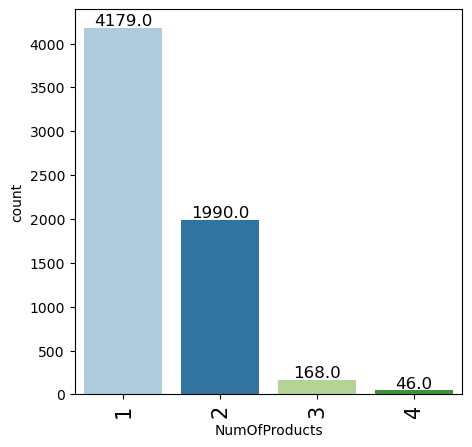

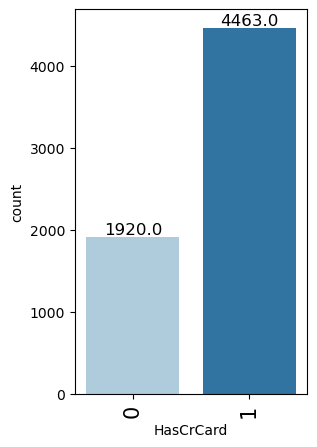

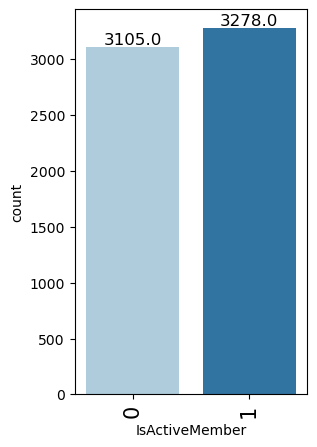

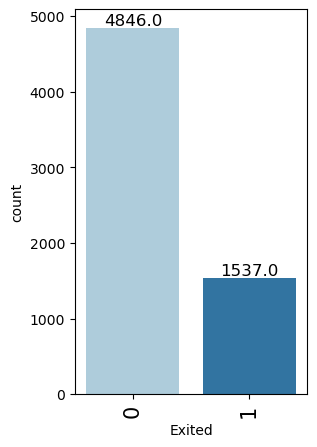

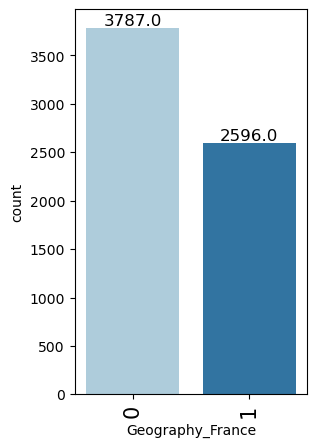

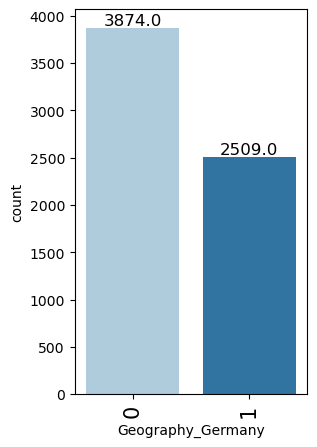

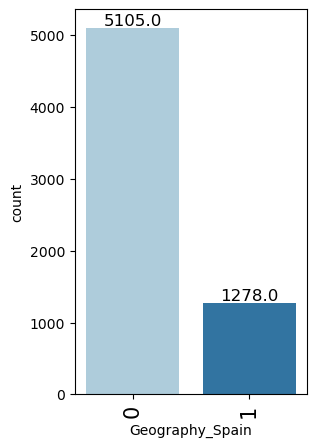

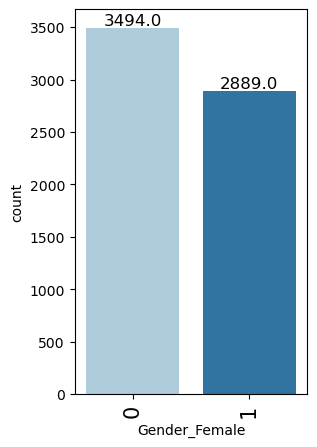

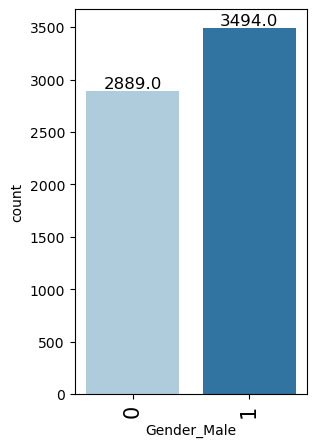

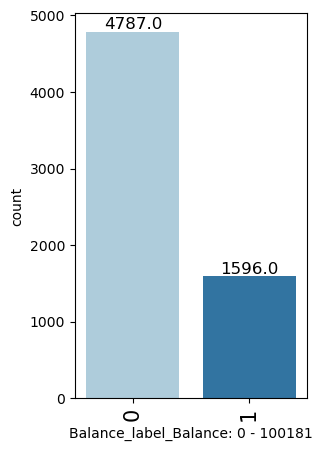

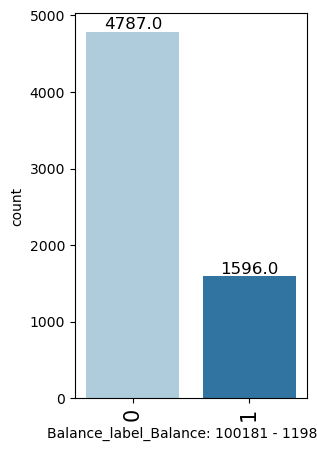

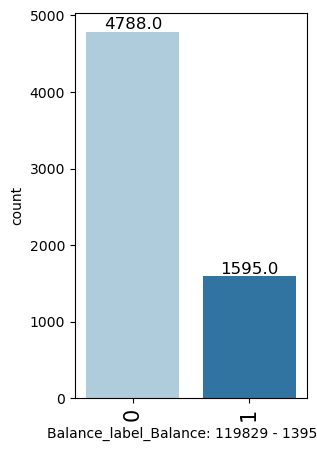

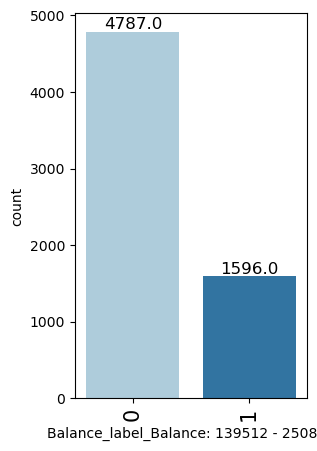

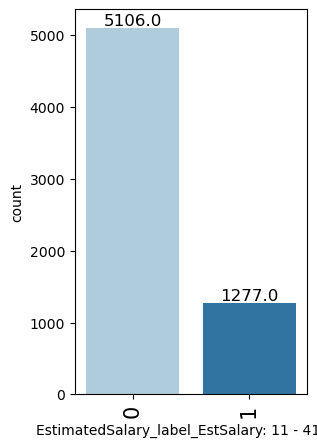

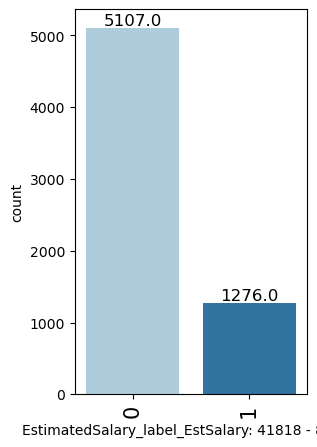

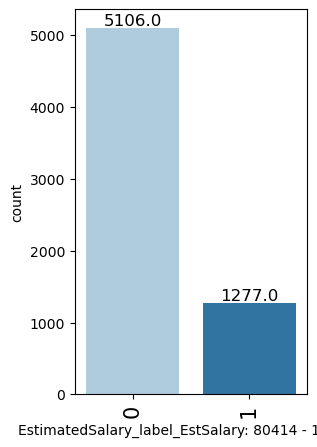

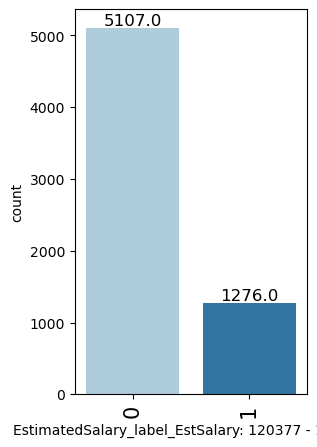

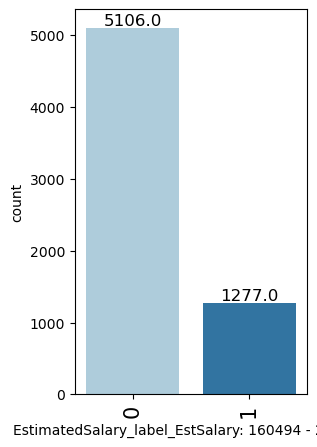

In [316]:
# labeled_barplot(Data, "Gender")


columns_list = []

for i in df.columns:
    if df.dtypes[i]!=object:
        columns_list.append(i)

for i in columns_list:
    labeled_barplot(df,i) 

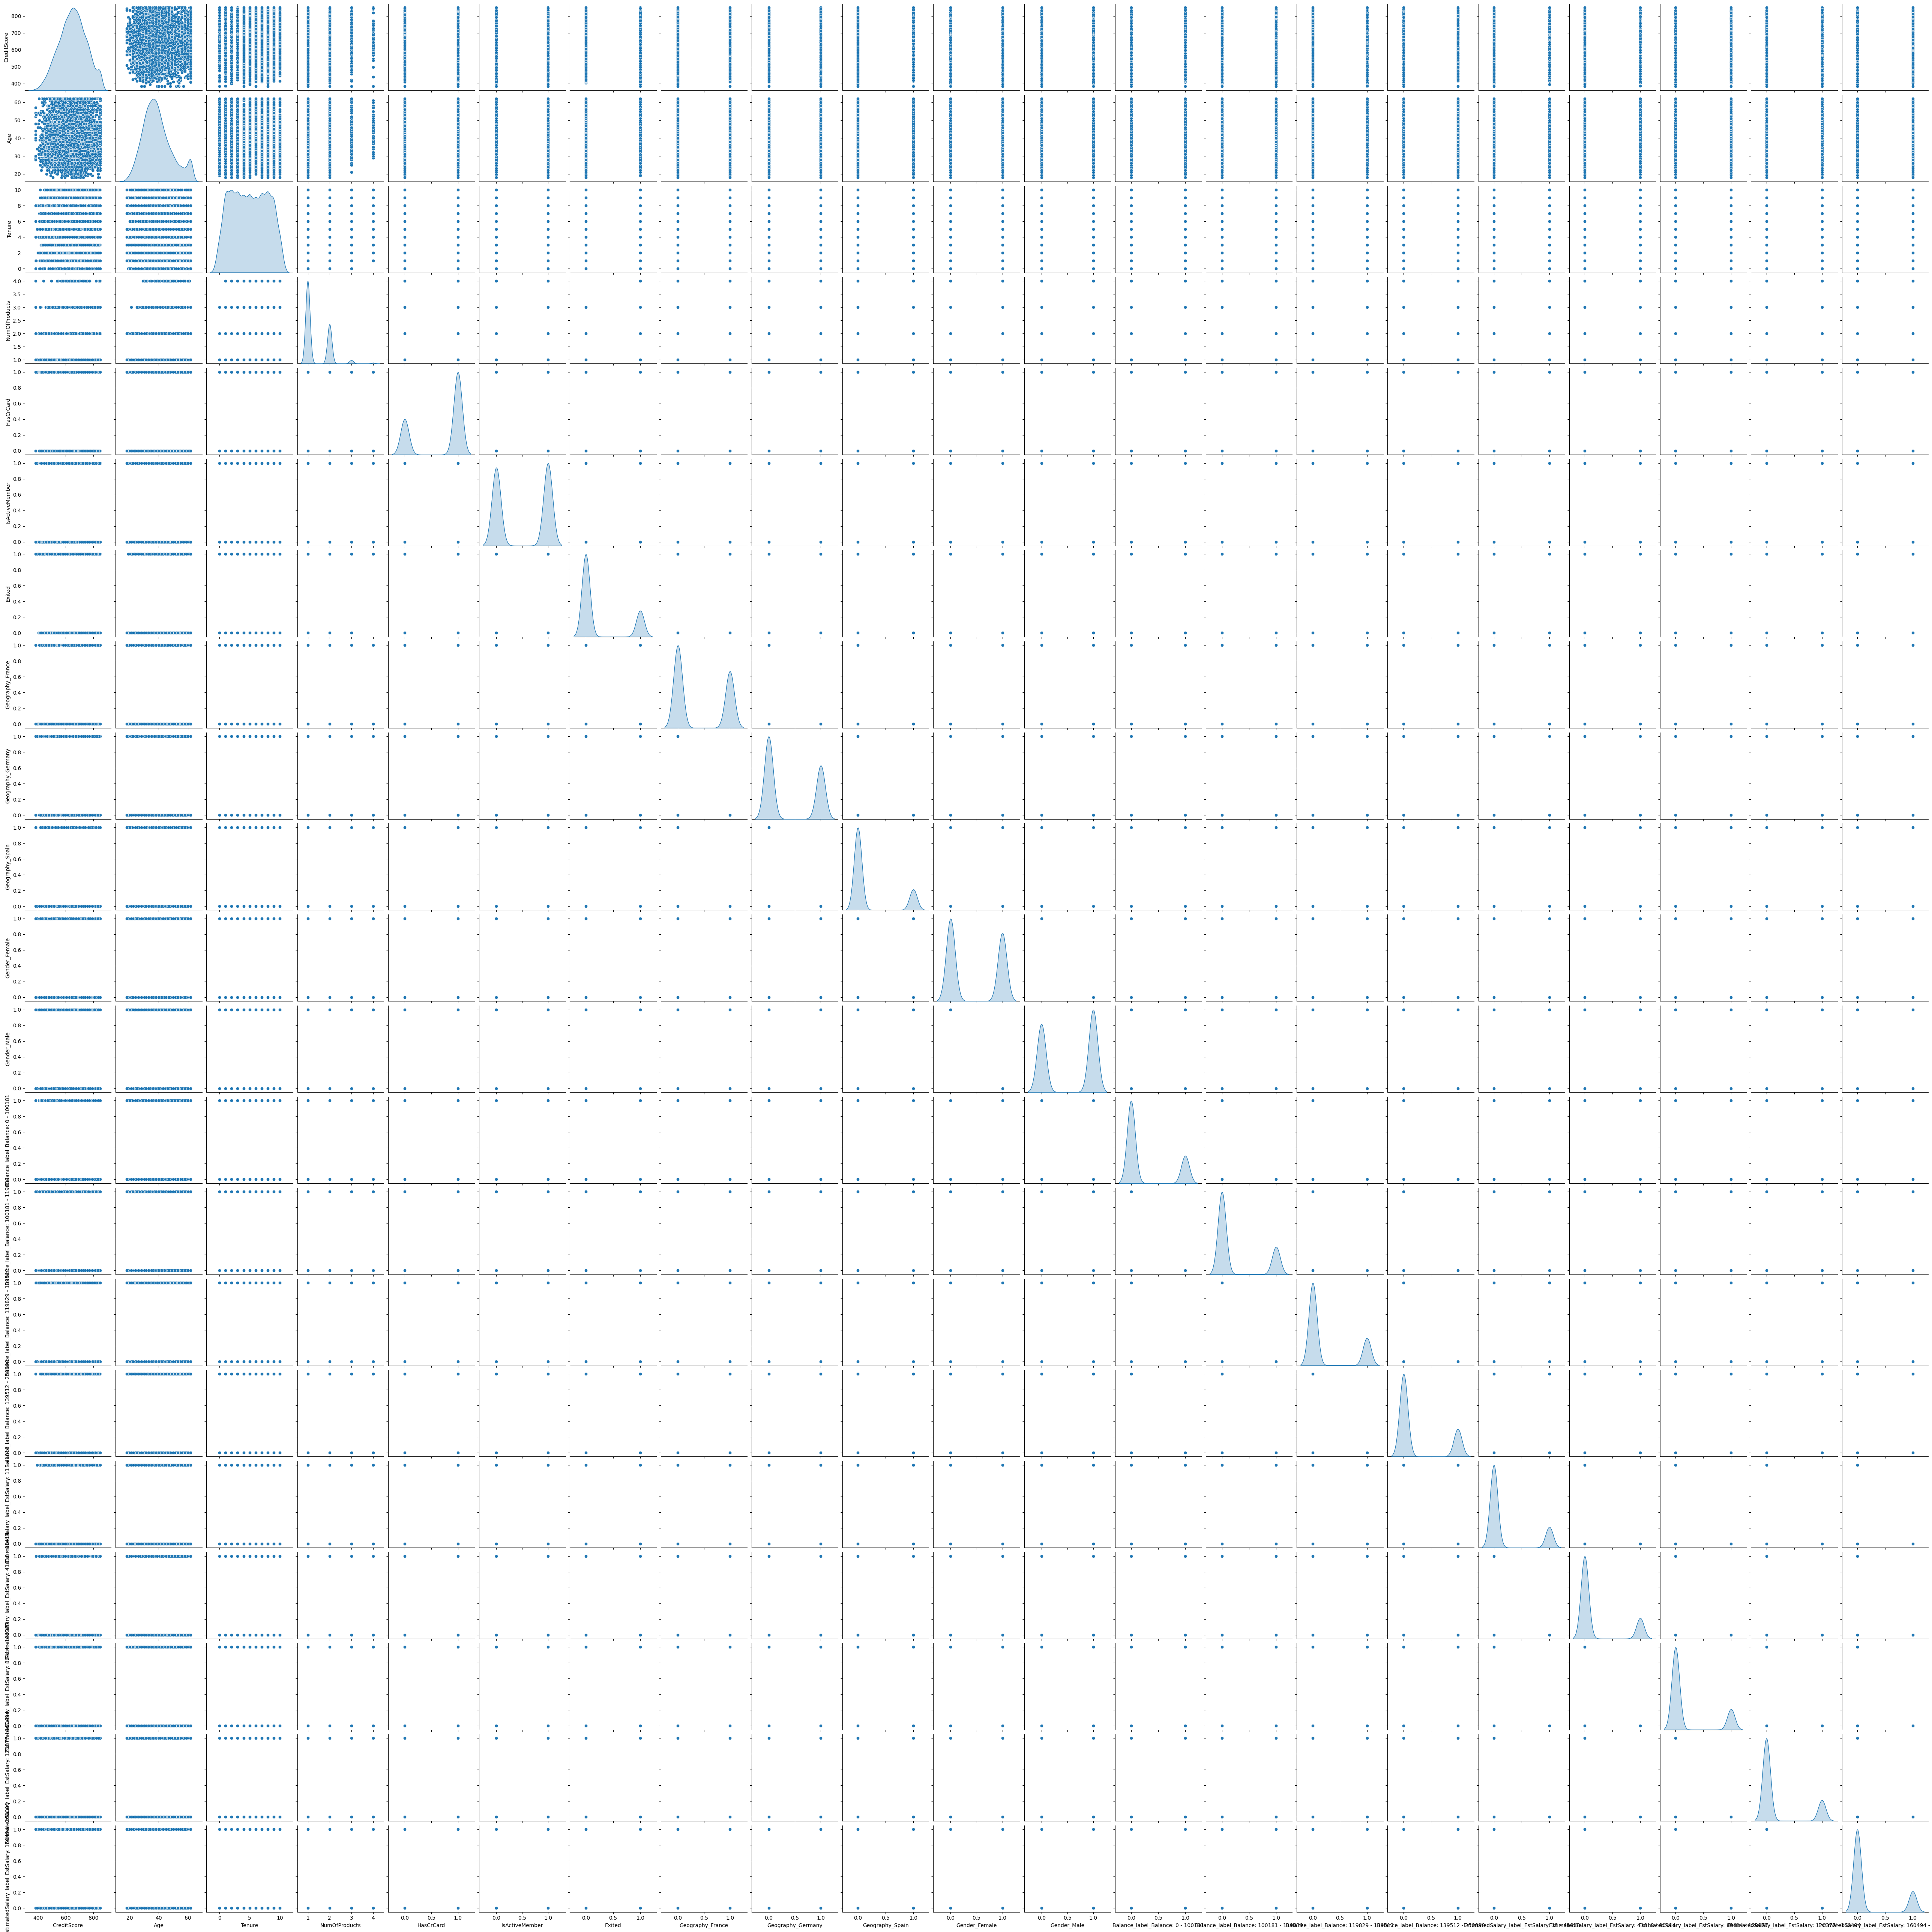

In [417]:
sns.pairplot(data=df[columns_list], diag_kind="kde")
plt.show()

## Observations

1. France has nearly double the rows as Spain and Germany.  This may mean the data is not balanced
2. Gender does seem well balanced proportionaly
3. We need to bucket the Ages still.  The 62 seems unusually high.  It probably represents 62+, so we will make a note of that
4. Tenure is failry well balanced
5. NumOfProducts still looks right skewed, with the highest count being 5084 for 1, and only 60 for 3.5
6. HasCrCard is unbalanced.  Most people seem to have a credit card with the bank, and few do not
7. It looks like, because of how the Age was binned, that most customers are between 31 and 40 years old
8. It looks like the majority of people have Balances under 70k.

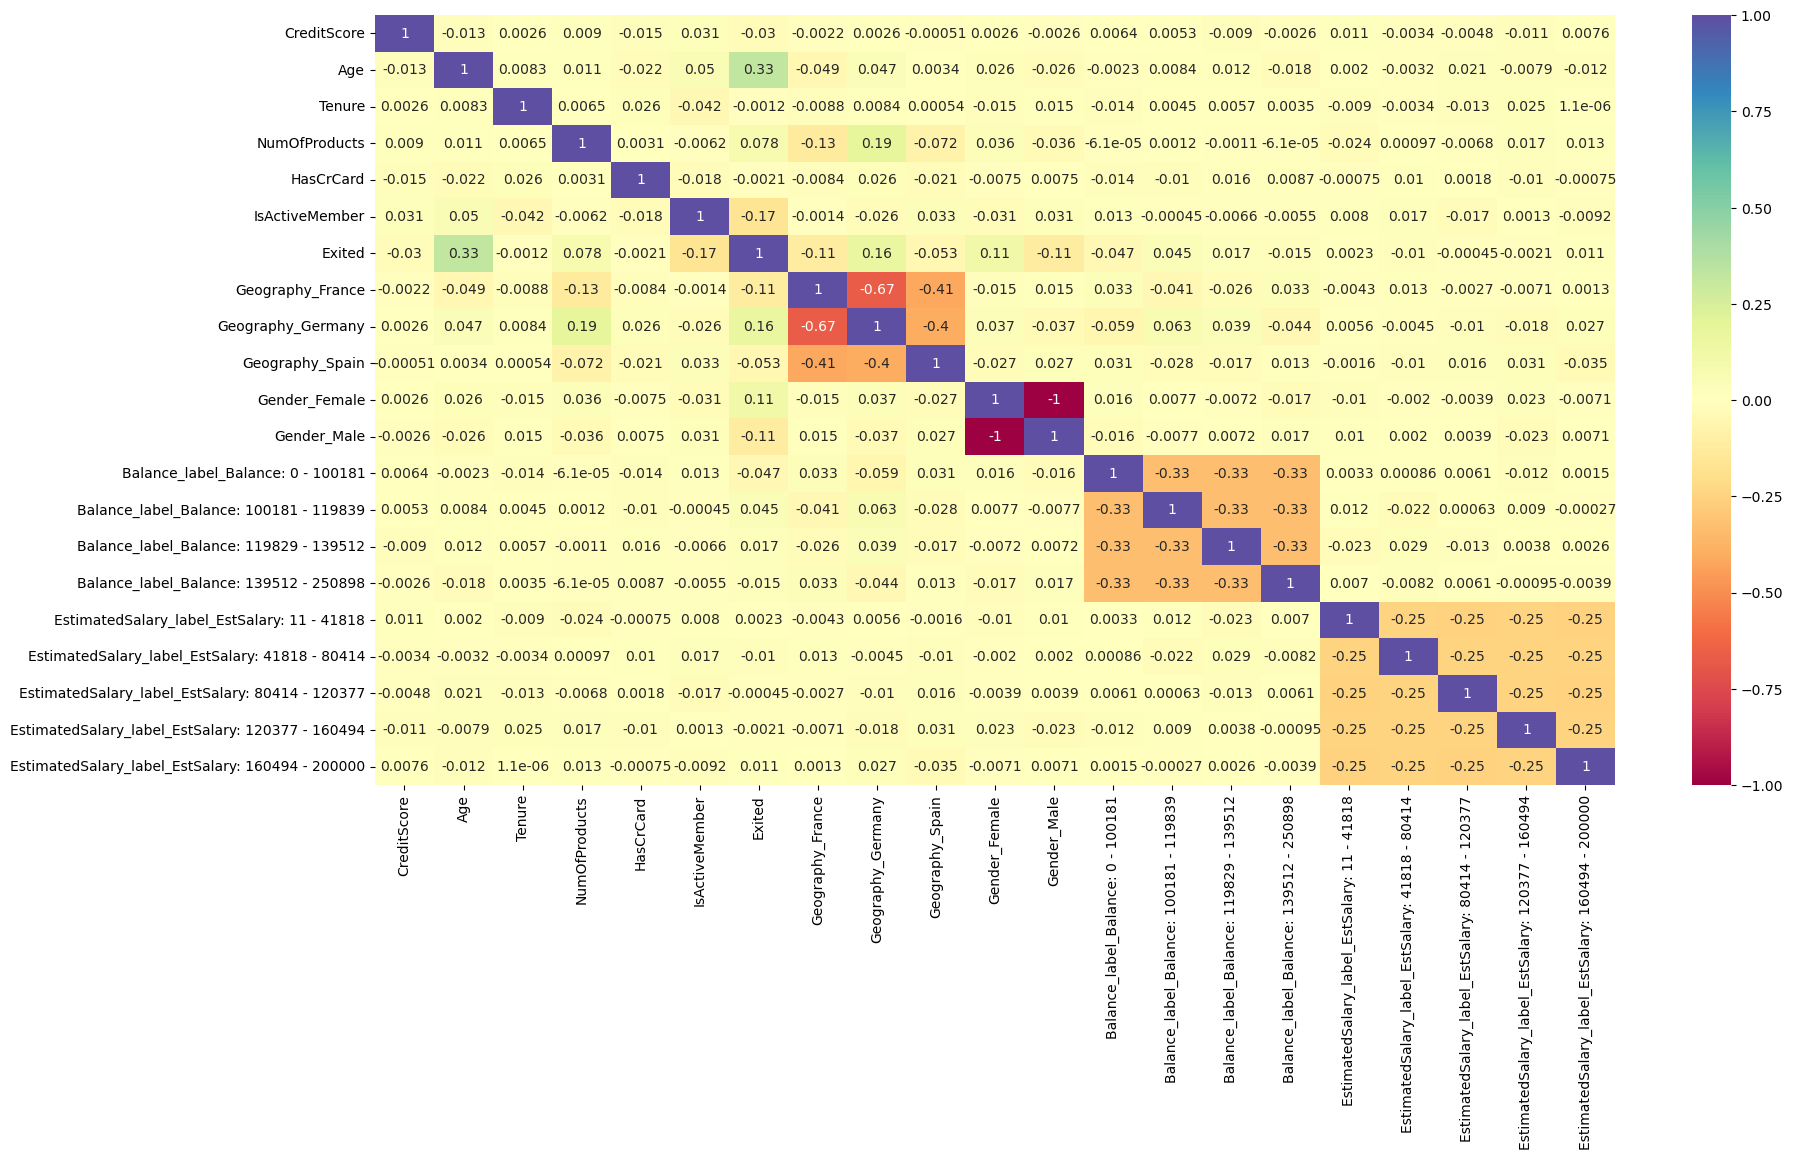

In [321]:
#correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [327]:
df.head()

CreditScore  Age  Tenure  NumOfProducts  HasCrCard  IsActiveMember  Exited  \
1          608   41       1              1          0               1       0   
2          502   42       8              3          1               0       1   
4          850   43       2              1          1               1       0   
5          645   44       8              2          1               0       1   
7          383   29       4              4          1               0       1   

   Geography_France  Geography_Germany  Geography_Spain  ...  Gender_Male  \
1                 0                  0                1  ...            0   
2                 1                  0                0  ...            0   
4                 0                  0                1  ...            0   
5                 0                  0                1  ...            1   
7                 0                  1                0  ...            0   

   Balance_label_Balance: 0 - 100181  Balance_label_Balance: 100181 - 119839  \
1                                  1                                       0   
2                                  0                                       0   
4                                  0                                       0   
5                                  0                                       1   
7                                  0                                       1   

   Balance_label_Balance: 119829 - 139512  \
1                                       0   
2                                       0   
4                                       1   
5                                       0   
7                                       0   

   Balance_label_Balance: 139512 - 250898  \
1                                       0   
2                                       1   
4                                       0   
5                                       0   
7                                       0   

   EstimatedSalary_label_EstSalary: 11 - 41818  \
1                                            0   
2                                            0   
4                                            0   
5                                            0   
7                                            0   

   EstimatedSalary_label_EstSalary: 41818 - 80414  \
1                                               0   
2                                               0   
4                                               1   
5                                               0   
7                                               0   

   EstimatedSalary_label_EstSalary: 80414 - 120377  \
1                                                1   
2                                                1   
4                                                0   
5                                                0   
7                                                1   

   EstimatedSalary_label_EstSalary: 120377 - 160494  \
1                                                 0   
2                                                 0   
4                                                 0   
5                                                 1   
7                                                 0   

   EstimatedSalary_label_EstSalary: 160494 - 200000  
1                                                 0  
2                                                 0  
4                                                 0  
5                                                 0  
7                                                 0  

[5 rows x 21 columns]

In [322]:
import pandas as pd
pd.set_option('display.max_rows', None)
#this one removes the 1 correlations due to variables being compared to each other
# Create correlation matrix
corr_mat = df.corr(method='pearson')

# Drop correlations where the variable names are the same
corr_mat = corr_mat.mask(np.tril(np.ones_like(corr_mat, dtype=bool)))

# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().drop_duplicates().sort_values()

# Remove correlations with a value of 1 or null values
sorted_mat = sorted_mat[(sorted_mat != 1) & (~sorted_mat.isnull())]

print(sorted_mat)


Gender_Male                                       Gender_Female                                      -1.00
Geography_Germany                                 Geography_France                                   -0.67
Geography_Spain                                   Geography_France                                   -0.41
                                                  Geography_Germany                                  -0.40
Balance_label_Balance: 100181 - 119839            Balance_label_Balance: 0 - 100181                  -0.33
Balance_label_Balance: 139512 - 250898            Balance_label_Balance: 100181 - 119839             -0.33
                                                  Balance_label_Balance: 0 - 100181                  -0.33
Balance_label_Balance: 119829 - 139512            Balance_label_Balance: 0 - 100181                  -0.33
Balance_label_Balance: 139512 - 250898            Balance_label_Balance: 119829 - 139512             -0.33
Balance_label_Balance: 119829 - 13951

In [324]:
df.head()

CreditScore  Age  Tenure  NumOfProducts  HasCrCard  IsActiveMember  Exited  \
1          608   41       1              1          0               1       0   
2          502   42       8              3          1               0       1   
4          850   43       2              1          1               1       0   
5          645   44       8              2          1               0       1   
7          383   29       4              4          1               0       1   

   Geography_France  Geography_Germany  Geography_Spain  ...  Gender_Male  \
1                 0                  0                1  ...            0   
2                 1                  0                0  ...            0   
4                 0                  0                1  ...            0   
5                 0                  0                1  ...            1   
7                 0                  1                0  ...            0   

   Balance_label_Balance: 0 - 100181  Balance_label_Balance: 100181 - 119839  \
1                                  1                                       0   
2                                  0                                       0   
4                                  0                                       0   
5                                  0                                       1   
7                                  0                                       1   

   Balance_label_Balance: 119829 - 139512  \
1                                       0   
2                                       0   
4                                       1   
5                                       0   
7                                       0   

   Balance_label_Balance: 139512 - 250898  \
1                                       0   
2                                       1   
4                                       0   
5                                       0   
7                                       0   

   EstimatedSalary_label_EstSalary: 11 - 41818  \
1                                            0   
2                                            0   
4                                            0   
5                                            0   
7                                            0   

   EstimatedSalary_label_EstSalary: 41818 - 80414  \
1                                               0   
2                                               0   
4                                               1   
5                                               0   
7                                               0   

   EstimatedSalary_label_EstSalary: 80414 - 120377  \
1                                                1   
2                                                1   
4                                                0   
5                                                0   
7                                                1   

   EstimatedSalary_label_EstSalary: 120377 - 160494  \
1                                                 0   
2                                                 0   
4                                                 0   
5                                                 1   
7                                                 0   

   EstimatedSalary_label_EstSalary: 160494 - 200000  
1                                                 0  
2                                                 0  
4                                                 0  
5                                                 0  
7                                                 0  

[5 rows x 21 columns]

In [329]:
# Select the columns before the 7th column
left_columns = df.iloc[:, 6:7]

# Select the columns after the rightmost 9 columns
right_columns = df.iloc[:, -9:]

# Concatenate the selected columns
test_df = pd.concat([left_columns, right_columns], axis=1)

test_df.head()

Exited  Balance_label_Balance: 0 - 100181  \
1       0                                  1   
2       1                                  0   
4       0                                  0   
5       1                                  0   
7       1                                  0   

   Balance_label_Balance: 100181 - 119839  \
1                                       0   
2                                       0   
4                                       0   
5                                       1   
7                                       1   

   Balance_label_Balance: 119829 - 139512  \
1                                       0   
2                                       0   
4                                       1   
5                                       0   
7                                       0   

   Balance_label_Balance: 139512 - 250898  \
1                                       0   
2                                       1   
4                                       0   
5                                       0   
7                                       0   

   EstimatedSalary_label_EstSalary: 11 - 41818  \
1                                            0   
2                                            0   
4                                            0   
5                                            0   
7                                            0   

   EstimatedSalary_label_EstSalary: 41818 - 80414  \
1                                               0   
2                                               0   
4                                               1   
5                                               0   
7                                               0   

   EstimatedSalary_label_EstSalary: 80414 - 120377  \
1                                                1   
2                                                1   
4                                                0   
5                                                0   
7                                                1   

   EstimatedSalary_label_EstSalary: 120377 - 160494  \
1                                                 0   
2                                                 0   
4                                                 0   
5                                                 1   
7                                                 0   

   EstimatedSalary_label_EstSalary: 160494 - 200000  
1                                                 0  
2                                                 0  
4                                                 0  
5                                                 0  
7                                                 0

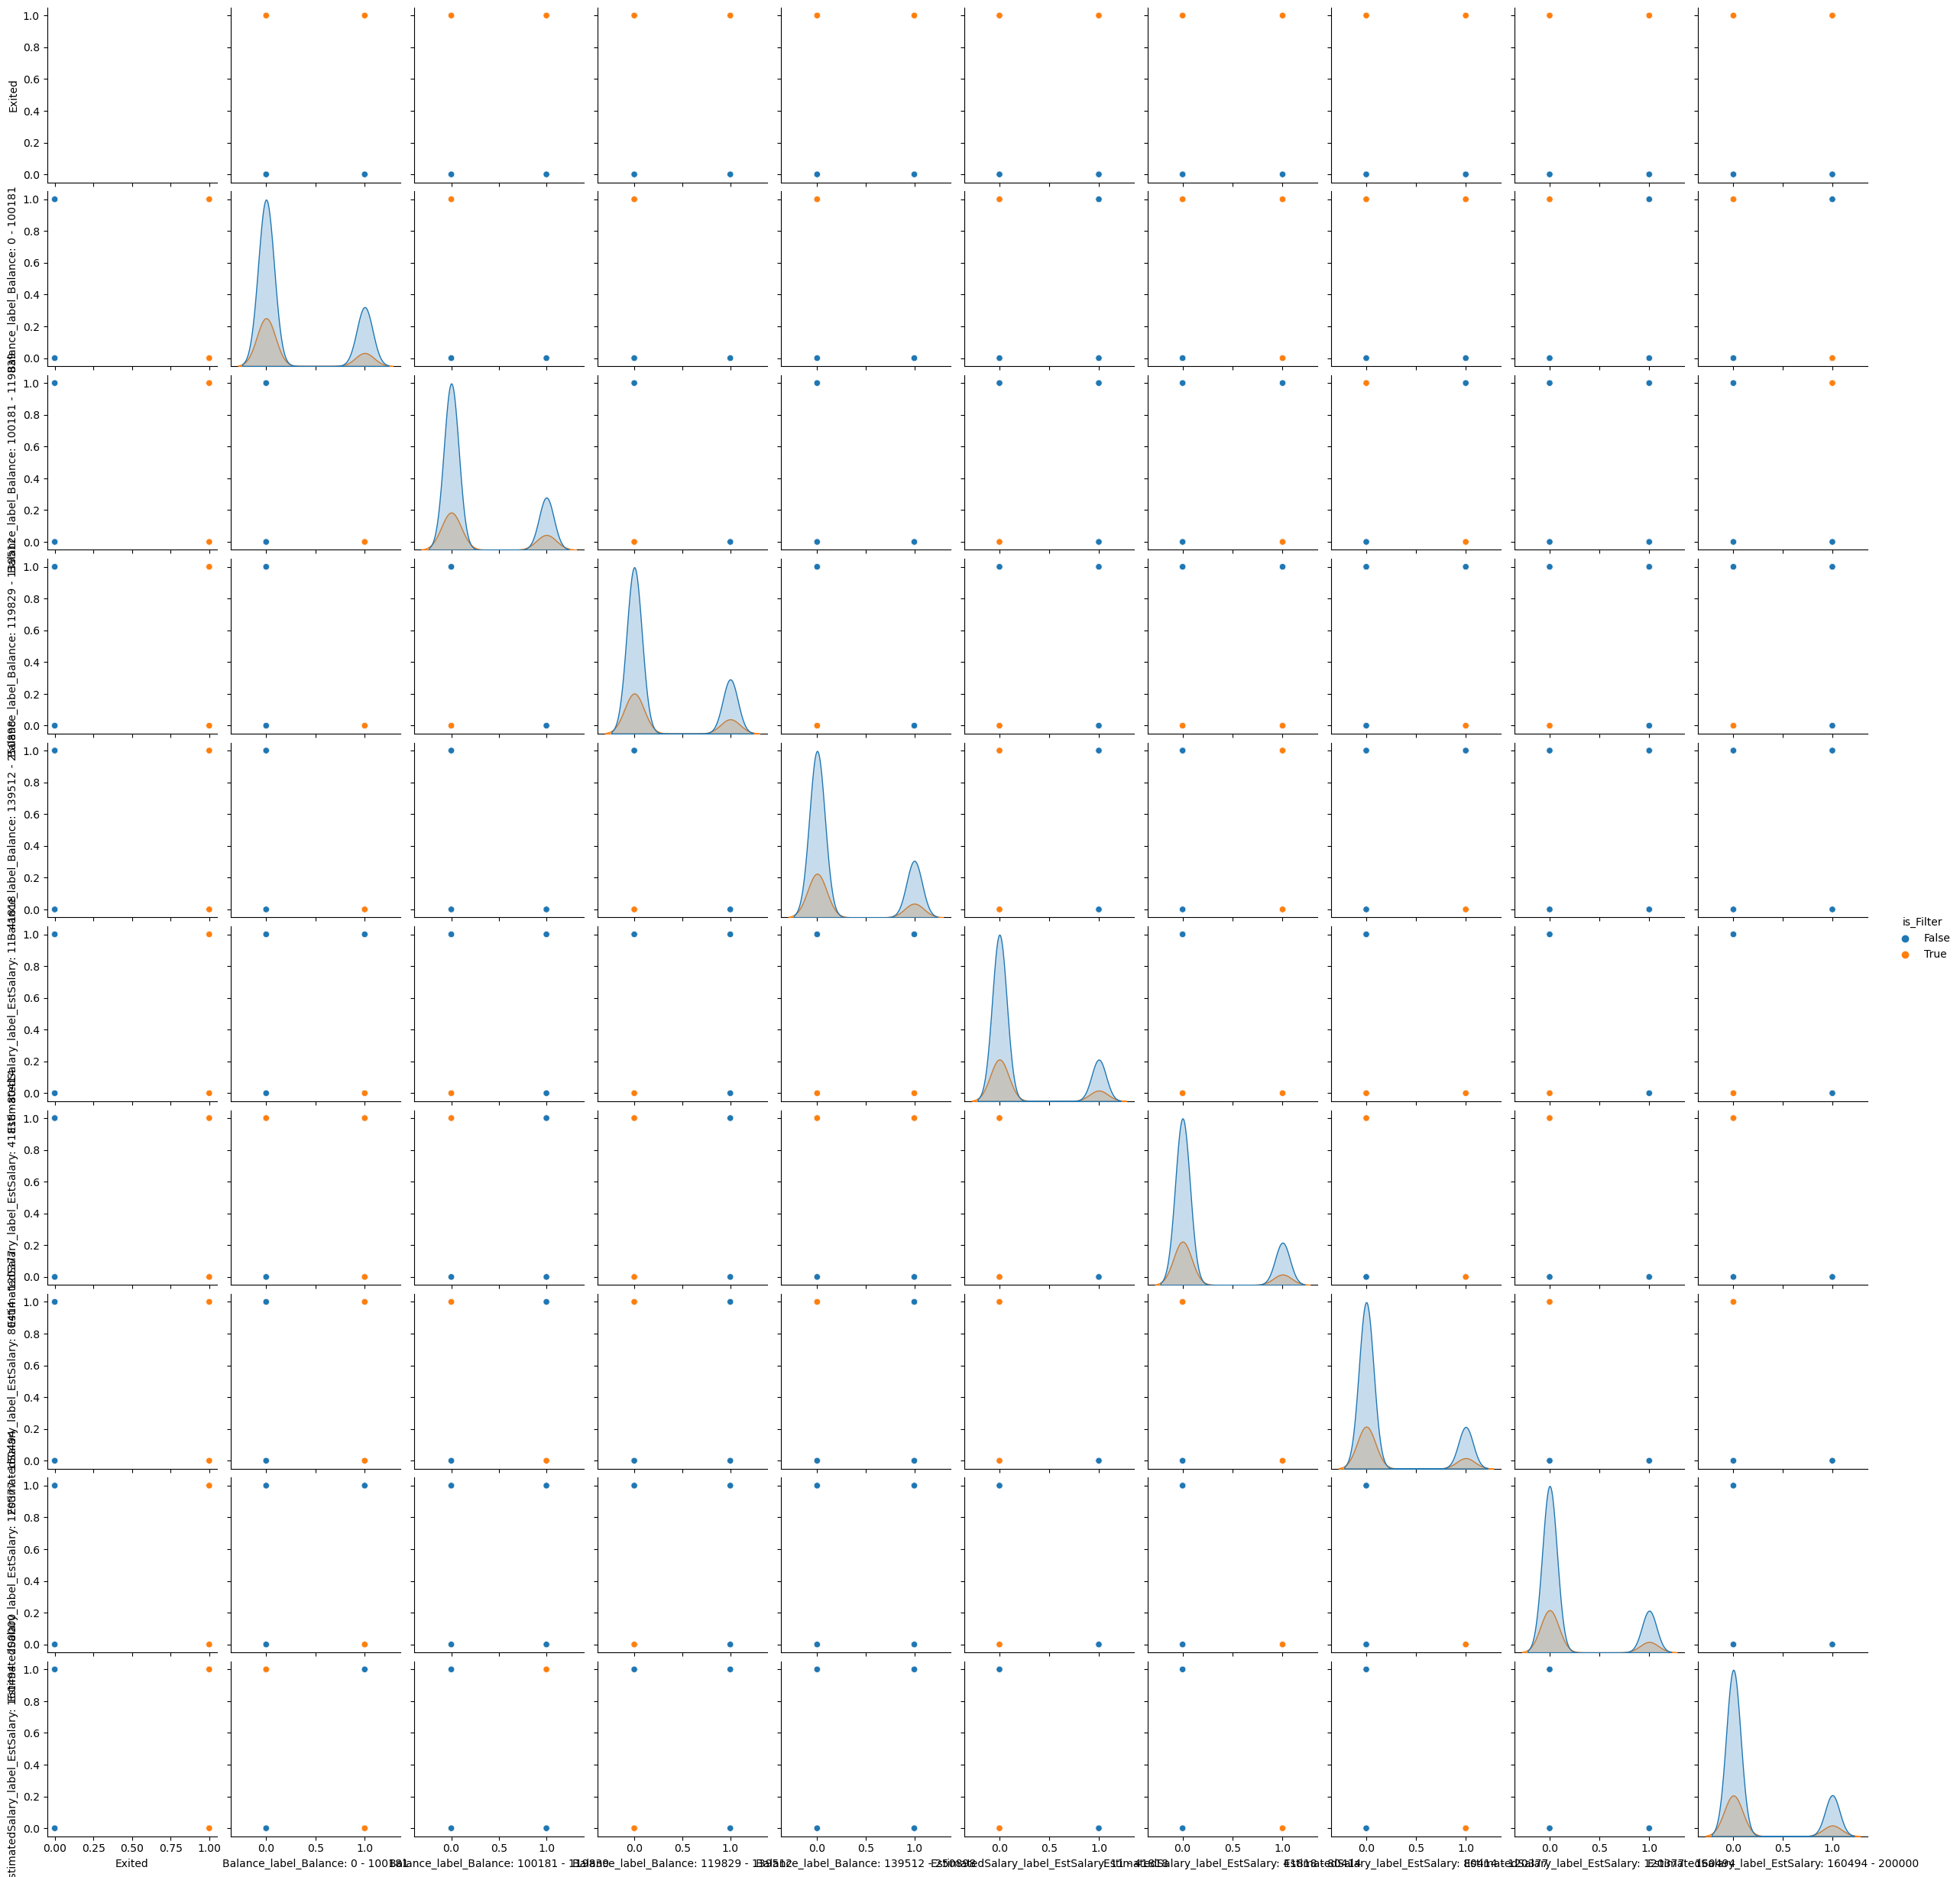

In [330]:


test_df['is_Filter'] = test_df['Exited'] == 1  # for hue
cols_to_exclude = ['Cat']
sns.pairplot(test_df[[colname for colname in test_df.columns if colname not in cols_to_exclude]], hue = 'is_Filter')
test_df.drop(['is_Filter'], axis=1, inplace=True)

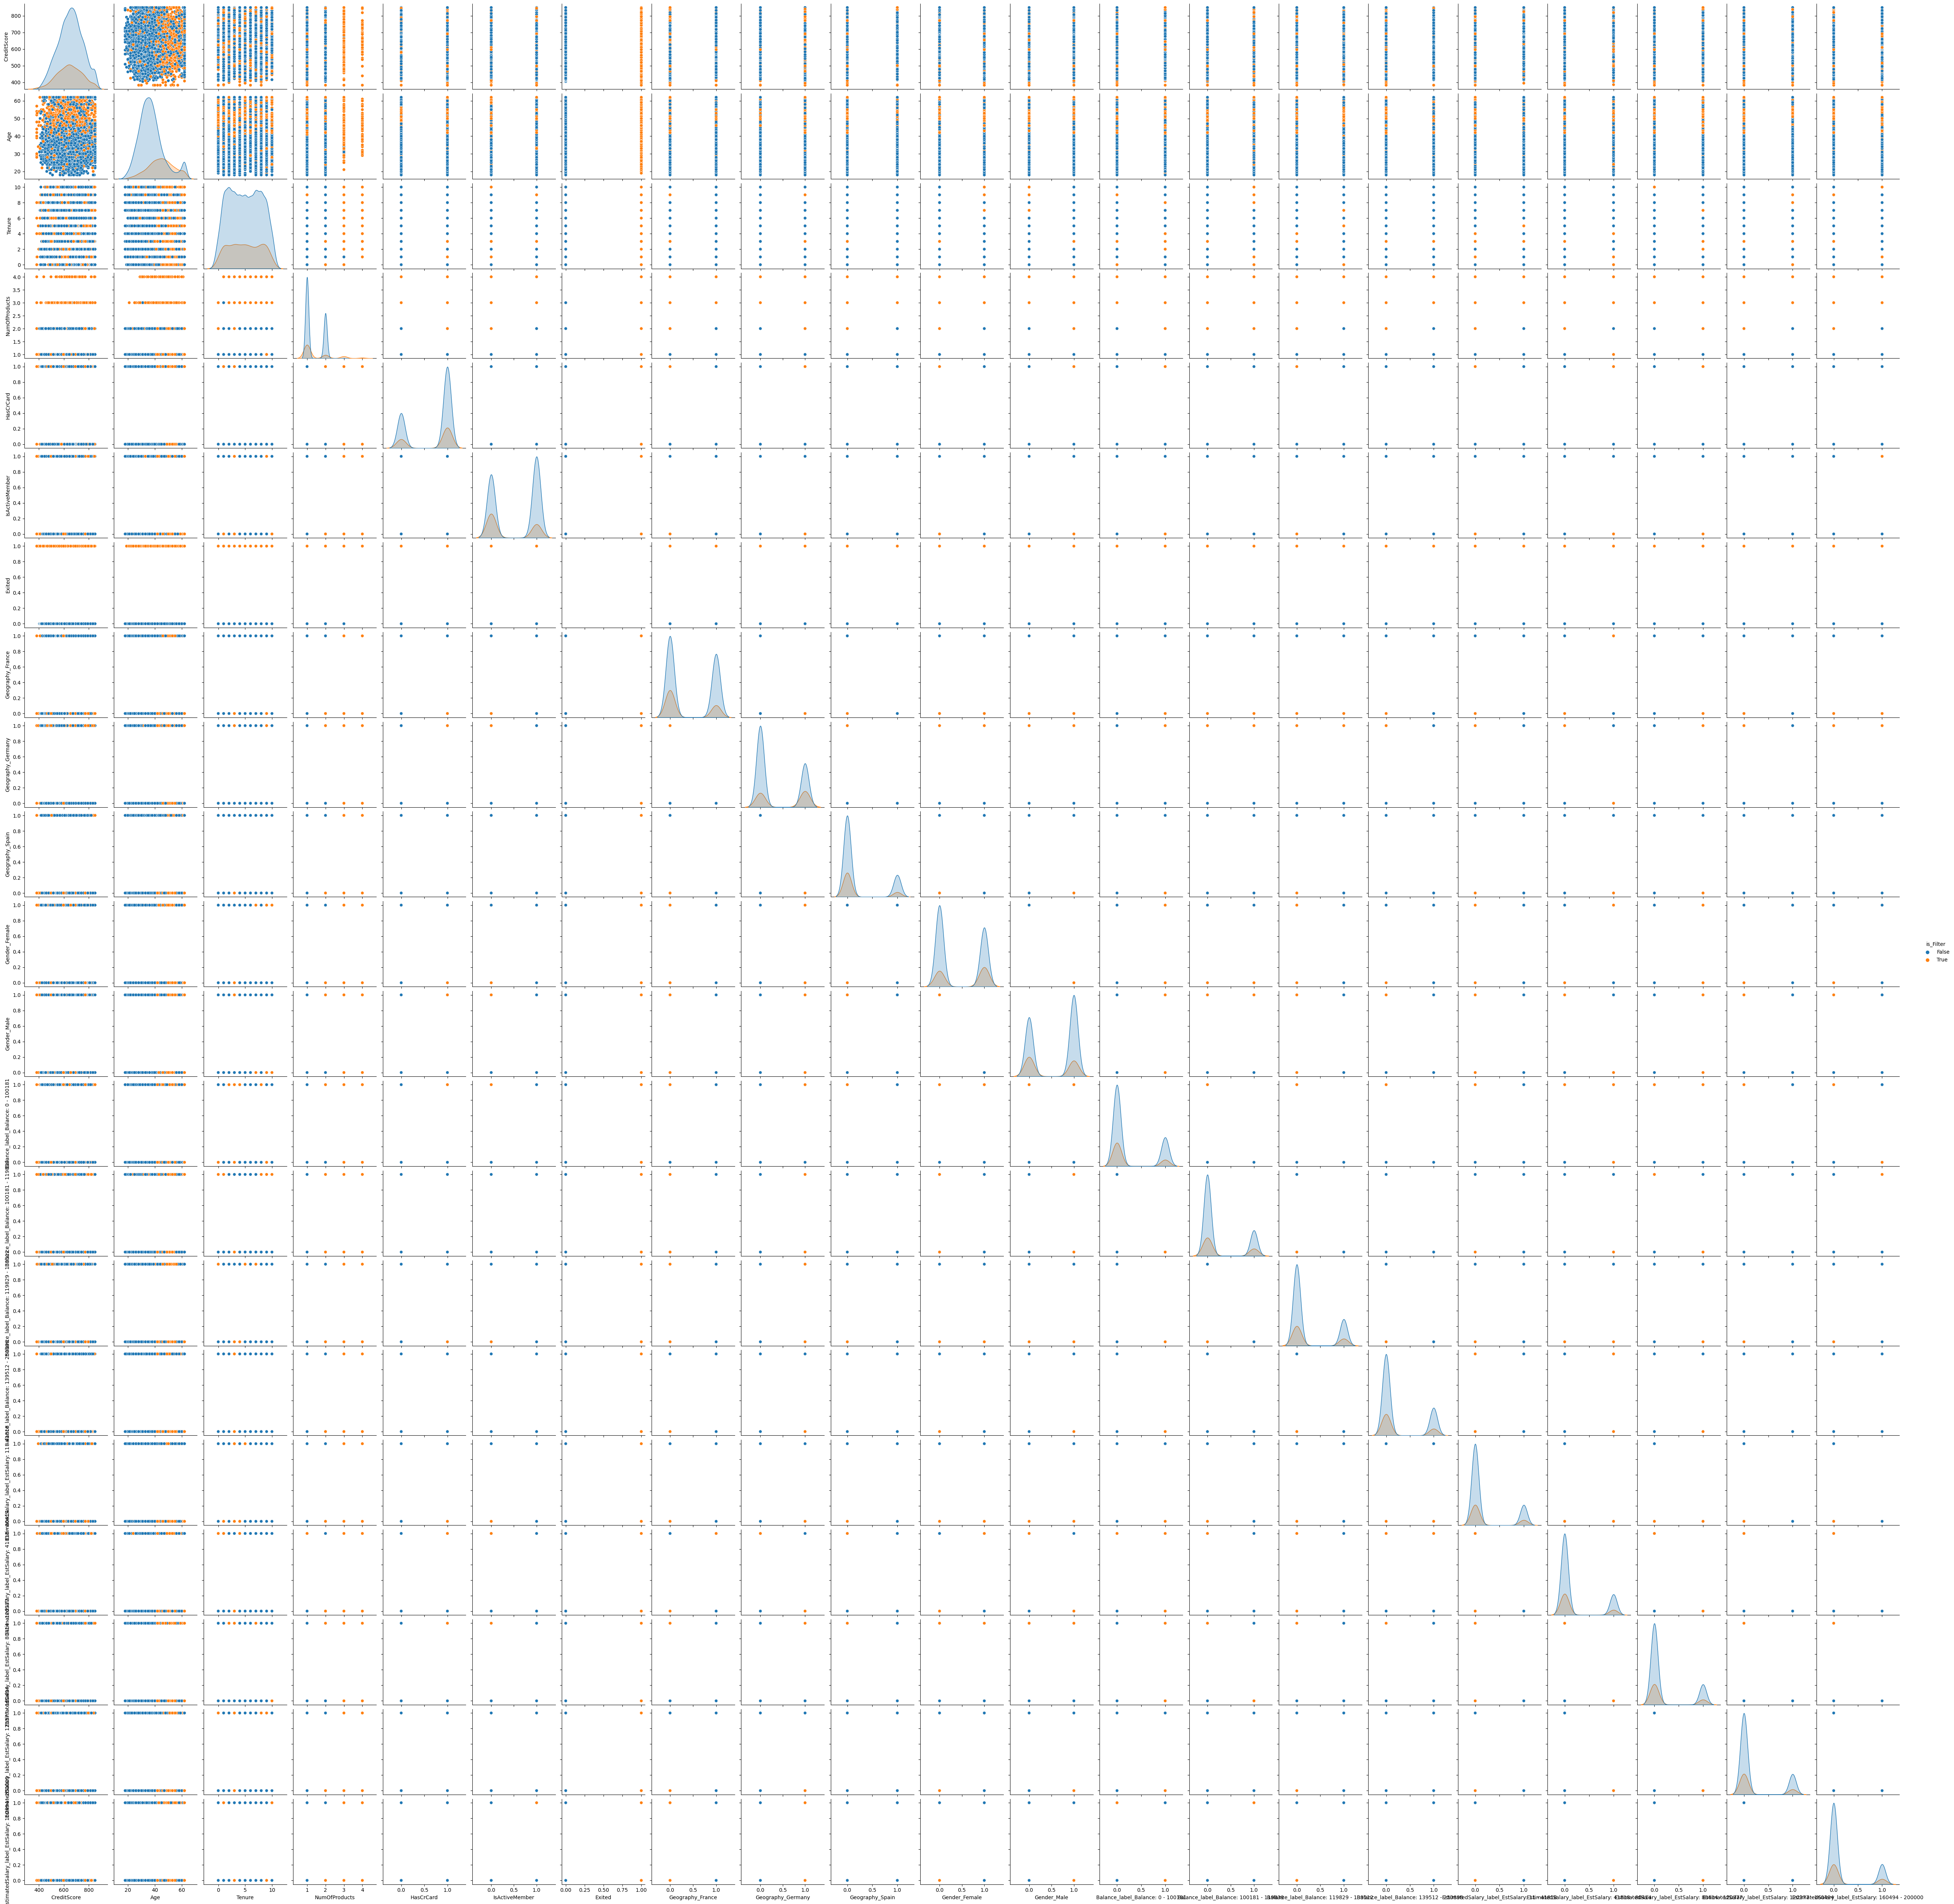

In [323]:
#correlation
test_df = df
test_df['is_Filter'] = test_df['Exited'] == 1  # for hue
cols_to_exclude = ['Cat']
sns.pairplot(test_df[[colname for colname in test_df.columns if colname not in cols_to_exclude]], hue = 'is_Filter')
test_df.drop(['is_Filter'], axis=1, inplace=True)

## Observations

1. It looks like People between the Ages of 40 and 60 exit the most regardless of CreditScore, Balance, or EstimatedSalary.
2. There is a fairly strong correlation between Germany and Blanace.  It looks like people in GErmany Exit the program when their balance is between about 100,000 and 200,00, and people outside of Germany (SPain and France) tend to exit the program when their balance is over 200,000.
3. There is a negative correlation between France and Balance.  Perhaps the lower the balance the more likely they are to exit.
4. In Spain most of the Males are exiting. in GErmany there is a balance of males and females that exit the program
5. Most people regardless of geography and age have over 2 products.

In [331]:
### Cross validate the accuracy of the data

# separating data into X and Y
X = df.drop(['Exited'], axis = 1)
Y = df['Exited']

from sklearn import preprocessing
# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) 

# creating train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify = Y)

# defining kfold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

# to build logstic regression model
from sklearn.linear_model import LogisticRegression

# defining the model
model = LogisticRegression(random_state = 1)

# storing accuracy values of model for every fold in "results"
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

# let's see the mean accuracy score
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: 78.559% (2.014%)


In [332]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4468 entries, 7112 to 4399
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   CreditScore                                       4468 non-null   int64
 1   Age                                               4468 non-null   int64
 2   Tenure                                            4468 non-null   int64
 3   NumOfProducts                                     4468 non-null   int64
 4   HasCrCard                                         4468 non-null   int64
 5   IsActiveMember                                    4468 non-null   int64
 6   Geography_France                                  4468 non-null   uint8
 7   Geography_Germany                                 4468 non-null   uint8
 8   Geography_Spain                                   4468 non-null   uint8
 9   Gender_Female                         

The model's average accuracy on the dataset is approximately 79.629%, which means it correctly predicts the class labels for about 78.914% of the instances on average.

The standard deviation of 1.559% suggests that the model's performance is relatively consistent across different folds. In other words, the accuracy scores from one fold to another do not vary widely.

In [337]:
#Model #1

#initialize the model
model_1 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
#units below is the number of neurons in the dense layer
model_1.add(Dense(units=16, input_dim = 20,activation='relu'))   # input of 10 columns as shown above
# hidden layer
model_1.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model_1.add(Dropout(0.5))
model_1.add(Dense(24,activation='relu'))
model_1.add(Dense(24,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model_1.add(Dense(1,activation='sigmoid')) 
# Create optimizer with default learning rate
# Compile the model
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [339]:
model_1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 16)                336       
                                                                 
 dense_106 (Dense)           (None, 24)                408       
                                                                 
 dropout_28 (Dropout)        (None, 24)                0         
                                                                 
 dense_107 (Dense)           (None, 24)                600       
                                                                 
 dense_108 (Dense)           (None, 24)                600       
                                                                 
 dense_109 (Dense)           (None, 1)                 25        
                                                                 
Total params: 1,969
Trainable params: 1,969
Non-train

In [340]:
#fitting the model
history1=model_1.fit(X_train,y_train,batch_size=15,epochs=100,validation_split=0.2)

Epoch 1/100
239/239 [==============================] - 1s 2ms/step - loss: 3.9876 - accuracy: 0.6900 - val_loss: 0.5673 - val_accuracy: 0.7964
Epoch 2/100
239/239 [==============================] - 0s 947us/step - loss: 0.7712 - accuracy: 0.7241 - val_loss: 0.6474 - val_accuracy: 0.7964
Epoch 3/100
239/239 [==============================] - 0s 900us/step - loss: 0.6072 - accuracy: 0.7652 - val_loss: 0.5312 - val_accuracy: 0.7964
Epoch 4/100
239/239 [==============================] - 0s 898us/step - loss: 0.5674 - accuracy: 0.7722 - val_loss: 0.5079 - val_accuracy: 0.7964
Epoch 5/100
239/239 [==============================] - 0s 897us/step - loss: 0.5852 - accuracy: 0.7753 - val_loss: 0.5519 - val_accuracy: 0.7964
Epoch 6/100
239/239 [==============================] - 0s 916us/step - loss: 0.5421 - accuracy: 0.7941 - val_loss: 0.5065 - val_accuracy: 0.7964
Epoch 7/100
239/239 [==============================] - 0s 895us/step - loss: 0.5255 - accuracy: 0.7971 - val_loss: 0.5566 - val_accu

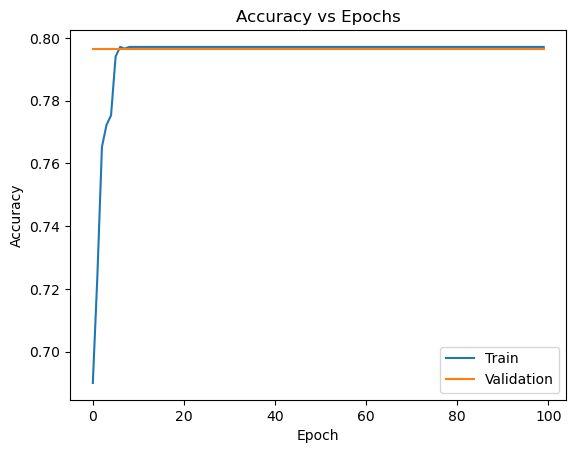

In [341]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

60/60 [==============================] - 0s 534us/step
Best Threshold=0.210576, G-Mean=0.052


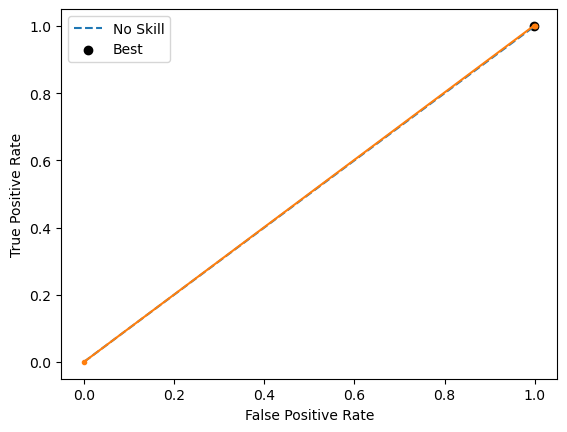

In [342]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model_1.predict(X_test)
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(Y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

## Observations

The Accuracy is a little low, and the loss is higher that I would like.

Also there is no ROC curve with means the model is not making useful distinctions between the positive and negative classes.

I'll try using the SMOTE technique to see if we can improve the preformance of the model.

In [347]:


# Splitting the dataset into the Training and Testing set.
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.8, random_state = 42)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.3, k_neighbors=5, random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [348]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 293
Before OverSampling, count of label '0': 983 

After OverSampling, count of label '1': 294
After OverSampling, count of label '0': 983 

After OverSampling, the shape of train_X: (1277, 20)
After OverSampling, the shape of train_y: (1277,) 



In [349]:
# to build logstic regression model
from sklearn.linear_model import LogisticRegression

# defining the model
model = LogisticRegression(random_state = 1)

# storing accuracy values of model for every fold in "results"
results = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring='accuracy')

In [350]:
# let's see the value of accuracy for every fold
print(results)

[0.8046875  0.828125   0.8046875  0.8125     0.78125    0.7890625
 0.8359375  0.8503937  0.81102362 0.73228346]


In [351]:
# let's see the mean accuracy score
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 80.500% (3.123%)


In [352]:
## Testing Ridge

from sklearn import preprocessing
# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))


## testing Ridge

ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

The coefficient for CreditScore is -0.008971117344083611
The coefficient for Age is 0.14869161654253046
The coefficient for Tenure is -0.006380013185686983
The coefficient for NumOfProducts is 0.015185421704473677
The coefficient for HasCrCard is -0.0011717280833360355
The coefficient for IsActiveMember is -0.0753157074456723
The coefficient for Geography_France is -6144859348862.27
The coefficient for Geography_Germany is -6110012361544.077
The coefficient for Geography_Spain is -5005820242469.596
The coefficient for Gender_Female is -7912655137696.856
The coefficient for Gender_Male is -7912655137696.893
The coefficient for Balance_label_Balance: 0 - 100181 is 1722602530809.1484
The coefficient for Balance_label_Balance: 100181 - 119839 is 1722602530809.1687
The coefficient for Balance_label_Balance: 119829 - 139512 is 1722242643093.7964
The coefficient for Balance_label_Balance: 139512 - 250898 is 1722602530809.1594
The coefficient for EstimatedSalary_label_EstSalary: 11 - 41818 is 

In [353]:
#Lasso

## testing lasso

lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-0.  0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0.  0.  0. -0.  0. -0. -0.
  0.  0.]


In [354]:
## compare

print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.18623169300464604
0.1470697705081333


In [355]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.18685243332145485
0.14621830343063857


In [356]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.0
-0.0006593610757554824


In [357]:
#### trying polynomials

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.30, random_state=1)
X_train.shape

(4468, 1351)

In [358]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

-1678885404694.8037


In [359]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.00000000e+00 -1.07527742e-03  3.80585075e-02 ...  1.21338685e-04
  3.83373919e-04 -6.71546807e-05]


In [360]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.33967512085526363
0.1053089928658163


In [361]:
#fitting the model
history=model_1.fit(X_train_over,y_train_over,batch_size=15,epochs=100,validation_split=0.2)

Epoch 1/100
69/69 [==============================] - 1s 3ms/step - loss: 0.5338 - accuracy: 0.7669 - val_loss: 0.4920 - val_accuracy: 0.7812
Epoch 2/100
69/69 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.7659 - val_loss: 0.4618 - val_accuracy: 0.7812
Epoch 3/100
69/69 [==============================] - 0s 1ms/step - loss: 0.4932 - accuracy: 0.7689 - val_loss: 0.4525 - val_accuracy: 0.7852
Epoch 4/100
69/69 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7806 - val_loss: 0.4423 - val_accuracy: 0.8125
Epoch 5/100
69/69 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7698 - val_loss: 0.4407 - val_accuracy: 0.8242
Epoch 6/100
69/69 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7826 - val_loss: 0.4359 - val_accuracy: 0.8242
Epoch 7/100
69/69 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.7875 - val_loss: 0.4279 - val_accuracy: 0.8164
Epoch 8/100
6

Epoch 59/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8697 - val_loss: 0.4403 - val_accuracy: 0.8086
Epoch 60/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8727 - val_loss: 0.4436 - val_accuracy: 0.8164
Epoch 61/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.8717 - val_loss: 0.4542 - val_accuracy: 0.8008
Epoch 62/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8766 - val_loss: 0.4551 - val_accuracy: 0.7969
Epoch 63/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8795 - val_loss: 0.4552 - val_accuracy: 0.7969
Epoch 64/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8717 - val_loss: 0.4605 - val_accuracy: 0.8164
Epoch 65/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.8786 - val_loss: 0.4638 - val_accuracy: 0.8047
Epoch 

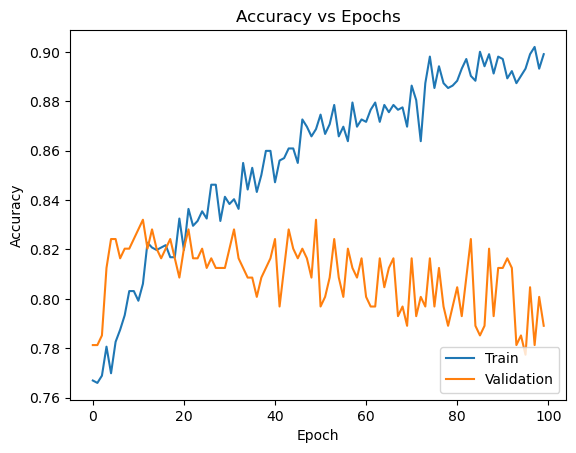

In [362]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [363]:
# testing underfitting
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)



In [364]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 1061
Before Under Sampling, count of label '0': 3407 

After Under Sampling, count of label '1': 1061
After Under Sampling, count of label '0': 1061 

After Under Sampling, the shape of train_X: (2122, 1351)
After Under Sampling, the shape of train_y: (2122,) 



In [365]:
# to build logstic regression model
from sklearn.linear_model import LogisticRegression

# defining the model
model = LogisticRegression(random_state = 1)

# storing accuracy values of model for every fold in "results"
results = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring='accuracy')

In [366]:
# let's see the value of accuracy for every fold
print(results)

[0.8046875  0.828125   0.8046875  0.8125     0.78125    0.7890625
 0.8359375  0.8503937  0.81102362 0.73228346]


In [367]:
# let's see the mean accuracy score
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 80.500% (3.123%)


In [368]:
from sklearn import preprocessing
# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for CreditScore is -0.008971117344083611
The coefficient for Age is 0.14869161654253046
The coefficient for Tenure is -0.006380013185686983
The coefficient for NumOfProducts is 0.015185421704473677
The coefficient for HasCrCard is -0.0011717280833360355
The coefficient for IsActiveMember is -0.0753157074456723
The coefficient for Geography_France is -6144859348862.27
The coefficient for Geography_Germany is -6110012361544.077
The coefficient for Geography_Spain is -5005820242469.596
The coefficient for Gender_Female is -7912655137696.856
The coefficient for Gender_Male is -7912655137696.893
The coefficient for Balance_label_Balance: 0 - 100181 is 1722602530809.1484
The coefficient for Balance_label_Balance: 100181 - 119839 is 1722602530809.1687
The coefficient for Balance_label_Balance: 119829 - 139512 is 1722242643093.7964
The coefficient for Balance_label_Balance: 139512 - 250898 is 1722602530809.1594
The coefficient for EstimatedSalary_label_EstSalary: 11 - 41818 is 

In [372]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
lasso = Lasso(alpha=0.3)
lasso.fit(X_train,y_train)

print("Ridge Train", ridge.score(X_train, y_train))
print("Ridge Test", ridge.score(X_test, y_test))
print("Lasso Train", lasso.score(X_train, y_train))
print("Lasso Test", lasso.score(X_test, y_test))

Ridge Train 0.18685243332145485
Ridge Test 0.14621830343063857
Lasso Train 0.0
Lasso Test -0.0006593610757554824


In [379]:
#Model #1

#initialize the model
model_1 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
#units below is the number of neurons in the dense layer
model_1.add(Dense(units=16, input_dim = 20,activation='relu'))   # input of 10 columns as shown above
# hidden layer
model_1.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model_1.add(Dropout(0.5))
model_1.add(Dense(24,activation='relu'))
model_1.add(Dense(24,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model_1.add(Dense(1,activation='sigmoid')) 
# Create optimizer with default learning rate
# Compile the model
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [380]:
#fitting the model
history1=model_1.fit(X_train_over,y_train_over,batch_size=15,epochs=100,validation_split=0.2)

Epoch 1/100
69/69 [==============================] - 1s 3ms/step - loss: 0.6036 - accuracy: 0.7336 - val_loss: 0.5197 - val_accuracy: 0.7812
Epoch 2/100
69/69 [==============================] - 0s 1ms/step - loss: 0.5354 - accuracy: 0.7669 - val_loss: 0.5054 - val_accuracy: 0.7812
Epoch 3/100
69/69 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.7669 - val_loss: 0.5024 - val_accuracy: 0.7812
Epoch 4/100
69/69 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7669 - val_loss: 0.5052 - val_accuracy: 0.7812
Epoch 5/100
69/69 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.7669 - val_loss: 0.4880 - val_accuracy: 0.7812
Epoch 6/100
69/69 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.7669 - val_loss: 0.4920 - val_accuracy: 0.7812
Epoch 7/100
69/69 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.7669 - val_loss: 0.4731 - val_accuracy: 0.7812
Epoch 8/100
6

Epoch 59/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8531 - val_loss: 0.5223 - val_accuracy: 0.7656
Epoch 60/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8482 - val_loss: 0.5249 - val_accuracy: 0.7578
Epoch 61/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.8560 - val_loss: 0.5357 - val_accuracy: 0.7578
Epoch 62/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.8511 - val_loss: 0.5520 - val_accuracy: 0.7422
Epoch 63/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8550 - val_loss: 0.5449 - val_accuracy: 0.7539
Epoch 64/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.8560 - val_loss: 0.5283 - val_accuracy: 0.7617
Epoch 65/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8668 - val_loss: 0.5479 - val_accuracy: 0.7539
Epoch 

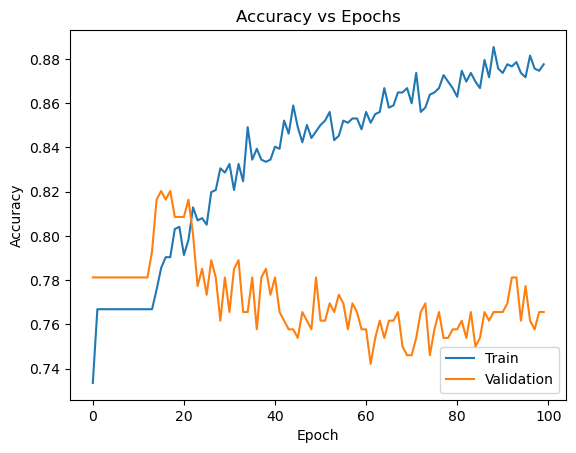

In [382]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [383]:
#Model #2

from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam

model_2 = Sequential()
model_2.add(Dense(units=32, input_dim=20, activation='relu', kernel_regularizer=l2(0.01)))
model_2.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))
model_2.add(Dropout(0.5))
model_2.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))
model_2.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))
model_2.add(Dense(1, activation='sigmoid'))

# Compile the model with a custom optimizer and learning rate
optimizer = Adam(learning_rate=0.001)
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [385]:
#fitting the model
history2=model_2.fit(X_train,y_train,batch_size=15,epochs=100,validation_split=0.2)

Epoch 1/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4655 - accuracy: 0.8344 - val_loss: 0.4737 - val_accuracy: 0.8356
Epoch 2/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.8321 - val_loss: 0.4774 - val_accuracy: 0.8378
Epoch 3/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.8369 - val_loss: 0.4732 - val_accuracy: 0.8255
Epoch 4/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4592 - accuracy: 0.8366 - val_loss: 0.4703 - val_accuracy: 0.8266
Epoch 5/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.8397 - val_loss: 0.4700 - val_accuracy: 0.8389
Epoch 6/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.8380 - val_loss: 0.4749 - val_accuracy: 0.8177
Epoch 7/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4504 - accuracy: 0.8369 - val_loss: 0.4661 - val_accuracy: 0.8322

Epoch 58/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8425 - val_loss: 0.4523 - val_accuracy: 0.8266
Epoch 59/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8430 - val_loss: 0.4520 - val_accuracy: 0.8199
Epoch 60/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8497 - val_loss: 0.4520 - val_accuracy: 0.8333
Epoch 61/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.8402 - val_loss: 0.4584 - val_accuracy: 0.8221
Epoch 62/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8439 - val_loss: 0.4532 - val_accuracy: 0.8311
Epoch 63/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8414 - val_loss: 0.4562 - val_accuracy: 0.8266
Epoch 64/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8444 - val_loss: 0.4461 - val_accuracy:

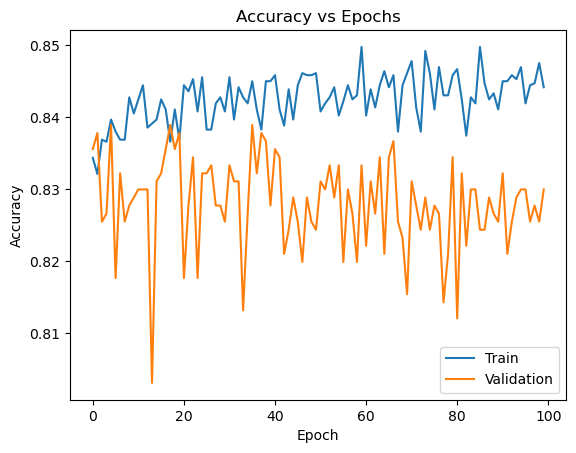

In [386]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [414]:

#Model #3

#initialize the model
model_3 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
#units below is the number of neurons in the dense layer
model_3.add(Dense(units=12, input_dim = 20,activation='relu'))   # input of 10 columns as shown above
# hidden layer
model_3.add(Dense(units=12,activation='relu'))
#Adding Dropout to prevent overfitting 
model_3.add(Dropout(0.5))
model_3.add(Dense(16,activation='relu'))
model_3.add(Dense(16,activation='relu'))



# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model_3.add(Dense(1,activation='sigmoid'))  

# Create optimizer with default learning rate
# Compile the model
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [415]:
#fitting the model
history3=model_3.fit(X_train,y_train,batch_size=15,epochs=100,validation_split=0.2)

Epoch 1/100
239/239 [==============================] - 1s 2ms/step - loss: 0.5536 - accuracy: 0.7613 - val_loss: 0.5223 - val_accuracy: 0.7606
Epoch 2/100
239/239 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7675 - val_loss: 0.5034 - val_accuracy: 0.7640
Epoch 3/100
239/239 [==============================] - 0s 930us/step - loss: 0.4923 - accuracy: 0.7711 - val_loss: 0.4925 - val_accuracy: 0.7673
Epoch 4/100
239/239 [==============================] - 0s 920us/step - loss: 0.4765 - accuracy: 0.7790 - val_loss: 0.4891 - val_accuracy: 0.7785
Epoch 5/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7871 - val_loss: 0.4808 - val_accuracy: 0.7852
Epoch 6/100
239/239 [==============================] - 0s 935us/step - loss: 0.4653 - accuracy: 0.7818 - val_loss: 0.4759 - val_accuracy: 0.7841
Epoch 7/100
239/239 [==============================] - 0s 930us/step - loss: 0.4620 - accuracy: 0.7832 - val_loss: 0.4727 - val_accuracy

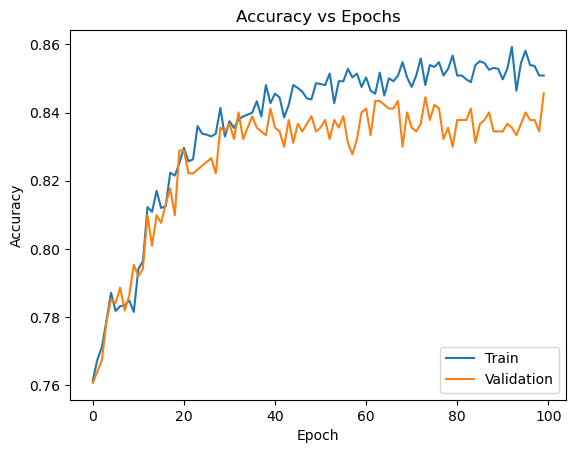

In [416]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [418]:
#Model 4

# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)




model_4 = Sequential()
model_4.add(Dense(units=12, input_dim=20, activation='relu')) 

model_4.add(Dense(64, activation='tanh', input_shape=(11,)))
model_4.add(Dropout(0.1))
model_4.add(Dense(32, activation='tanh'))
model_4.add(Dropout(0.1))
model_4.add(Dense(16, activation='tanh'))
model_4.add(Dense(1, activation='sigmoid'))


model_4.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_4.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_205 (Dense)           (None, 12)                252       
                                                                 
 dense_206 (Dense)           (None, 64)                832       
                                                                 
 dropout_49 (Dropout)        (None, 64)                0         
                                                                 
 dense_207 (Dense)           (None, 32)                2080      
                                                                 
 dropout_50 (Dropout)        (None, 32)                0         
                                                                 
 dense_208 (Dense)           (None, 16)                528       
                                                                 
 dense_209 (Dense)           (None, 1)               

In [419]:
#fitting the model
history4=model_4.fit(X_train,y_train,batch_size=15,epochs=100,validation_split=0.2)

Epoch 1/100
239/239 [==============================] - 1s 2ms/step - loss: 0.5086 - accuracy: 0.7602 - val_loss: 0.4936 - val_accuracy: 0.7707
Epoch 2/100
239/239 [==============================] - 0s 949us/step - loss: 0.4624 - accuracy: 0.7885 - val_loss: 0.4881 - val_accuracy: 0.7673
Epoch 3/100
239/239 [==============================] - 0s 942us/step - loss: 0.4513 - accuracy: 0.7955 - val_loss: 0.4780 - val_accuracy: 0.7785
Epoch 4/100
239/239 [==============================] - 0s 939us/step - loss: 0.4405 - accuracy: 0.8030 - val_loss: 0.4712 - val_accuracy: 0.7796
Epoch 5/100
239/239 [==============================] - 0s 929us/step - loss: 0.4294 - accuracy: 0.8083 - val_loss: 0.4678 - val_accuracy: 0.7852
Epoch 6/100
239/239 [==============================] - 0s 933us/step - loss: 0.4215 - accuracy: 0.8176 - val_loss: 0.4542 - val_accuracy: 0.7919
Epoch 7/100
239/239 [==============================] - 0s 954us/step - loss: 0.4157 - accuracy: 0.8215 - val_loss: 0.4535 - val_accu

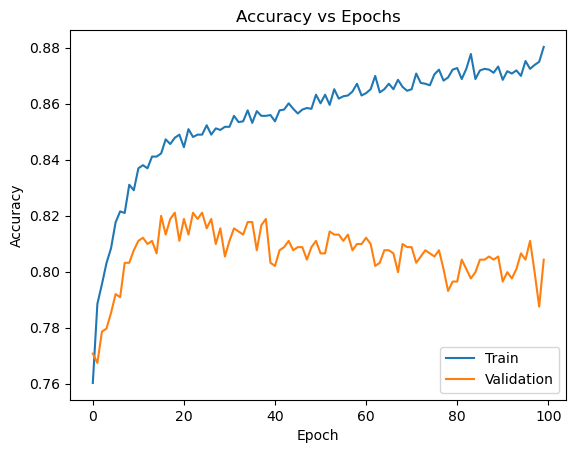

In [420]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [397]:
#Model #5


model_5 = Sequential()
model_5.add(Dense(units=32, input_dim=20, activation='relu')) 

model_5.add(Dense(256, activation='tanh', input_shape=(7,)))
model_5.add(Dropout(0.1))
model_5.add(Dense(128, activation='tanh'))
model_5.add(Dropout(0.1))
model_5.add(Dense(64, activation='tanh'))
model_5.add(Dropout(0.1))
model_5.add(Dense(32, activation='tanh'))
model_5.add(Dense(1, activation='sigmoid'))

model_5.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_5.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 32)                672       
                                                                 
 dense_155 (Dense)           (None, 256)               8448      
                                                                 
 dropout_39 (Dropout)        (None, 256)               0         
                                                                 
 dense_156 (Dense)           (None, 128)               32896     
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_157 (Dense)           (None, 64)                8256      
                                                                 
 dropout_41 (Dropout)        (None, 64)              

In [398]:
#fitting the model
history5=model_5.fit(X_train,y_train,batch_size=15,epochs=100,validation_split=0.2)

Epoch 1/100
239/239 [==============================] - 1s 2ms/step - loss: 0.4872 - accuracy: 0.7753 - val_loss: 0.4845 - val_accuracy: 0.7819
Epoch 2/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.8125 - val_loss: 0.4513 - val_accuracy: 0.8043
Epoch 3/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8251 - val_loss: 0.4710 - val_accuracy: 0.8098
Epoch 4/100
239/239 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8304 - val_loss: 0.4361 - val_accuracy: 0.8076
Epoch 5/100
239/239 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8422 - val_loss: 0.4409 - val_accuracy: 0.8154
Epoch 6/100
239/239 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8380 - val_loss: 0.4600 - val_accuracy: 0.8076
Epoch 7/100
239/239 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8433 - val_loss: 0.4432 - val_accuracy: 0.8065

Epoch 58/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1725 - accuracy: 0.9219 - val_loss: 0.7044 - val_accuracy: 0.7707
Epoch 59/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1721 - accuracy: 0.9261 - val_loss: 0.7444 - val_accuracy: 0.7796
Epoch 60/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1552 - accuracy: 0.9317 - val_loss: 0.7429 - val_accuracy: 0.7852
Epoch 61/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1607 - accuracy: 0.9323 - val_loss: 0.7276 - val_accuracy: 0.7908
Epoch 62/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9365 - val_loss: 0.7630 - val_accuracy: 0.7651
Epoch 63/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1645 - accuracy: 0.9309 - val_loss: 0.7668 - val_accuracy: 0.7718
Epoch 64/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1538 - accuracy: 0.9362 - val_loss: 0.7580 - val_accuracy:

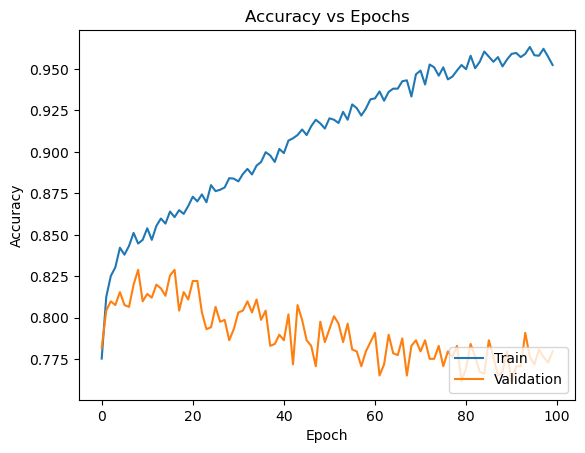

In [399]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [422]:
model_3.evaluate(X_test, y_test, verbose = 1)
test_pred = np.round(model_3.predict(X_test))

60/60 [==============================] - 0s 528us/step


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1439
           1       0.73      0.44      0.55       476

    accuracy                           0.82      1915
   macro avg       0.79      0.69      0.72      1915
weighted avg       0.81      0.82      0.80      1915



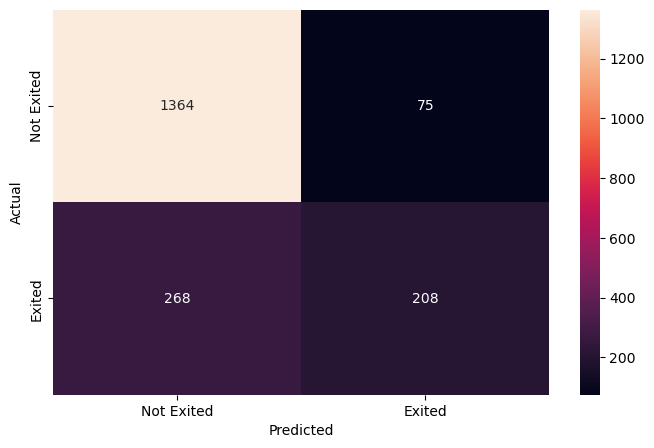

In [423]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Observations

Model 3 seems to preform the best

I have to keep the number of neuron down, because I noticed when I increased them it was causing inacuracies between the training and validation datasets

I also noticed the more hidden layers that were added the less the model learned, so I kept the layers low for model 3